# **Mid-Term Numeric Project**

**Making Informed Investment Decisions in California Housing Market using Machine Learning**


**Team Name:** **Code Wizards** <br>
**Team Members** : Bhavya Hegde, Blessy Dickson Daniel Moses, Darshini Venkatesha Murthy Nag, Sirisha Polisetty

**Work Distribution:**<br/>
All of us performed K-means and GMM Clustering, Fractal Clustering, Classification and Amalgamation of Datasets, Feature Importance Analysis, Changing Data Distribution, Dynamic Data Visualization, and Regression on Latent Variables.

As part of this final ipynb file we have distributed the work as shown below

**Data Scraping** - Team <br/>
**Bhavya Hegde** - Exploratory Data Analysis, GMM Clustering, Regression on latent variable desirability score, House price prediction for next 1,2,5 years. <br/>
**Blessy Dickson Daniel Moses** -  Muller Loop, Classification on DS1, Classification into most,more, and least desirable properties, Changing Data Distribution and Visualization on Feature Rent, Regression on latent variable Investment Potential, Implementation of Keras Model.<br/>
**Darshini Venkatesha Murthy Nag** - Muller Loop, Classification on DS1+DS2, Classification on DS1+DS2+DS3, Feature Importance Analysis, Changing Data Distribution and Visualization on Feature Price, Regression on latent variable Living Experience Quality. <br/>
**Sirisha Polisetty** - K-means clustering, Fractal clustering, Regression and muller loop on latent variable Financial feasibility. <br/>



#**Business Narrative**
Our mission is to provide valuable insights and guidance to prospective investors and homebuyers, empowering them to make informed decisions about investing in real estate. We understand that real estate is a significant financial commitment, and it’s crucial to assess its viability thoroughly. Through our platform, we offer a comprehensive suite of tools, data, and expertise to help individuals navigate the complex world of real estate investments.

In [1]:
!pip install holoviews bokeh pydrive ipywidgets scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning
from pandas.errors import SettingWithCopyWarning

In [3]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id="1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"

In [5]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [6]:

id="1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
data=pd.read_csv("RF_Housingdata_final_new.csv")
data1=data.copy()

In [7]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table


import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# **Exploratory Data Analysis and Visualization**

## Data Narrative

Main dataset is downloaded from redfin and uploaded here : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped data for
walk score is from : https://www.walkscore.com/ <br/>
crime rate , property crime: https://247wallst.com/state/crime-in-california/ <br/>
School rating : https://www.niche.com/places-to-live/z/95134/ <br/>

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B)

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapped housing values data for past years are uploaded here : https://drive.google.com/drive/u/0/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Scrapping python code files are uploaded here : https://drive.google.com/drive/u/0/folders/1AUoQVwR2NNi6NyKju3OZq07dNSHhzwrj


In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE:** This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE:** The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE:** This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS:** The specific address of the property, providing detailed location information.

**CITY:** The city where the property is located.

**STATE OR PROVINCE:** The state or province where the property is situated.

**ZIP_CODE:** The postal code of the property's location, which can be used for regional analysis.

**PRICE:** The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS:** The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS:** The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE:** The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#:** The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE:** A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED:** This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE:** These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE:** A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME:** This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME:** A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING:** This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children  

**MONTHLY_RENT_ESTIMATE** : Indicates the monthly rent estimate of the property.

**ANNUAL_RENT_ESTIMATE** : Indicates the annual rent estimate of the property.

**MORTGAGE_FEES_PER_MONTH** : Indicates indicate the additional costs, beyond principal and interest, included in the monthly mortgage payment, such as property taxes, insurance, and other related expenses.

**MORTGAGE_FEES_PER_YEAR** : Indicates the total annual cost of additional expenses, beyond principal and interest, associated with your mortgage, including property taxes, insurance, and related fees.


In [8]:
data.shape

(4042, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 35 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

In [10]:
data.head(15)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,37.817373,-122.254688,84,6421,7692,712.0,5350,64200,3203,38436
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,37.835305,-122.221226,30,6421,7692,582.0,10750,129000,6437,77244
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,37.835468,-122.276067,90,21187,22528,NaN,5890,70680,3527,42324
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,37.814753,-122.255872,84,6421,7692,712.0,4390,52680,2629,31548
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,37.820653,-122.249832,86,6421,7692,564.0,4190,50280,2509,30108
5,MLS Listing,NaN,Condo/Co-op,585 9Th St #305,Oakland,CA,94607,475000,1.0,1.0,...,37.801934,-122.276431,99,6421,7692,NaN,4750,57000,2844,34128
6,MLS Listing,NaN,Condo/Co-op,850 W Grand Ave Unit B,Oakland,CA,94607,479000,1.0,1.0,...,37.814190,-122.277152,92,6421,7692,NaN,4790,57480,2868,34416
7,MLS Listing,NaN,Condo/Co-op,2201 West St Unit B,Oakland,CA,94612,475000,1.0,1.0,...,37.813040,-122.276434,92,6421,7692,760.0,4750,57000,2844,34128
8,MLS Listing,NaN,Single Family Residential,2241 96th Ave,Oakland,CA,94603,449000,1.0,1.0,...,37.750314,-122.162216,68,6421,7692,NaN,4490,53880,2688,32256
9,MLS Listing,NaN,Condo/Co-op,700 Canyon Oaks Dr Unit A,Oakland,CA,94605,499500,1.0,1.0,...,37.773389,-122.144401,23,6421,7692,NaN,4995,59940,2991,35892


In [11]:
data.duplicated().any()

True

In [12]:

data = data.drop_duplicates()

In [13]:
data.duplicated().any()

False

In [14]:

data.shape

(3886, 35)

In [15]:
data = data.drop(columns=['SOLD DATE','SALE TYPE','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME', 'STATUS','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE','FAVORITE', 'INTERESTED', 'MLS#','SCHOOL_RANKING'])

In [16]:
data['PRICE'] = data['PRICE'].astype(float)
data['BEDS'] = data['BEDS'].astype(float)
data['BATHS'] = data['BATHS'].astype(float)
data['SQUARE FEET'] = data['SQUARE FEET'].astype(float)
data['LOT SIZE'] = data['LOT SIZE'].astype(float)
data['YEAR BUILT'] = data['YEAR BUILT'].astype(float)
data['$/SQUARE FEET'] = data['$/SQUARE FEET'].astype(float)
data['HOA/MONTH'] = data['HOA/MONTH'].astype(float)
data['WALK_SCORE'] = data['WALK_SCORE'].astype(float)
data['PROPERTY_CRIME'] = data['PROPERTY_CRIME'].astype(float)
data['TOTAL_CRIME'] = data['TOTAL_CRIME'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ANNUAL_RENT_ESTIMATE'] = data['ANNUAL_RENT_ESTIMATE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MORTGAGE_FEES_PER_YEAR'] = data['MORTGAGE_FEES_PER_YEAR'].astype(float)

In [17]:
data.fillna({
    'ADDRESS': 'Unknown',
    'BEDS': 0,
    'BATHS': 0,
    'LOCATION': 'Unknown',
    'SQUARE FEET': 0,
    'LOT SIZE': 0,
    'YEAR BUILT': data['YEAR BUILT'].median(),
    '$/SQUARE FEET': data['$/SQUARE FEET'].mean(),
    'HOA/MONTH': data['HOA/MONTH'].mean()
}, inplace=True)

A heatmap is a graphical representation of data where values in a matrix are represented as colors. It's commonly used to visualize relationships, patterns, or correlations between variables in a dataset. Darker colors often indicate stronger or more negative relationships, while lighter colors suggest weaker or positive associations

<ipython-input-18-b8947f1dc649>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


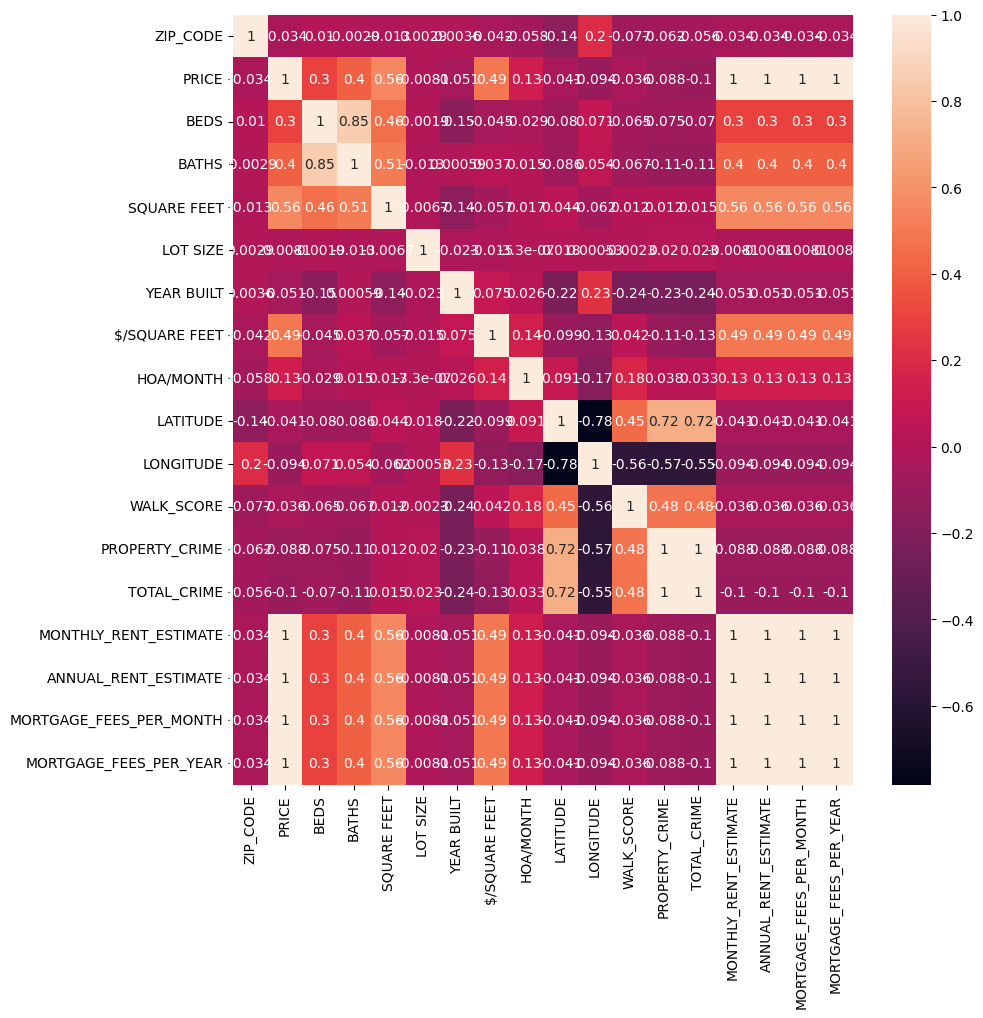

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

Each histogram will show the frequency of values within different value ranges. This visualization is helpful for understanding the data distribution, identifying potential outliers, and gaining insights into the characteristics of your dataset

array([[<Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATHS'}>],
       [<Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>],
       [<Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>],
       [<Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>,
        <Axes: title={'center': 'MONTHLY_RENT_ESTIMATE'}>,
        <Axes: title={'center': 'ANNUAL_RENT_ESTIMATE'}>],
       [<Axes: title={'center': 'MORTGAGE_FEES_PER_MONTH'}>,
        <Axes: title={'center': 'MORTGAGE_FEES_PER_YEAR'}>, <Axes: >,
        <Axes: >]], dtype=object)

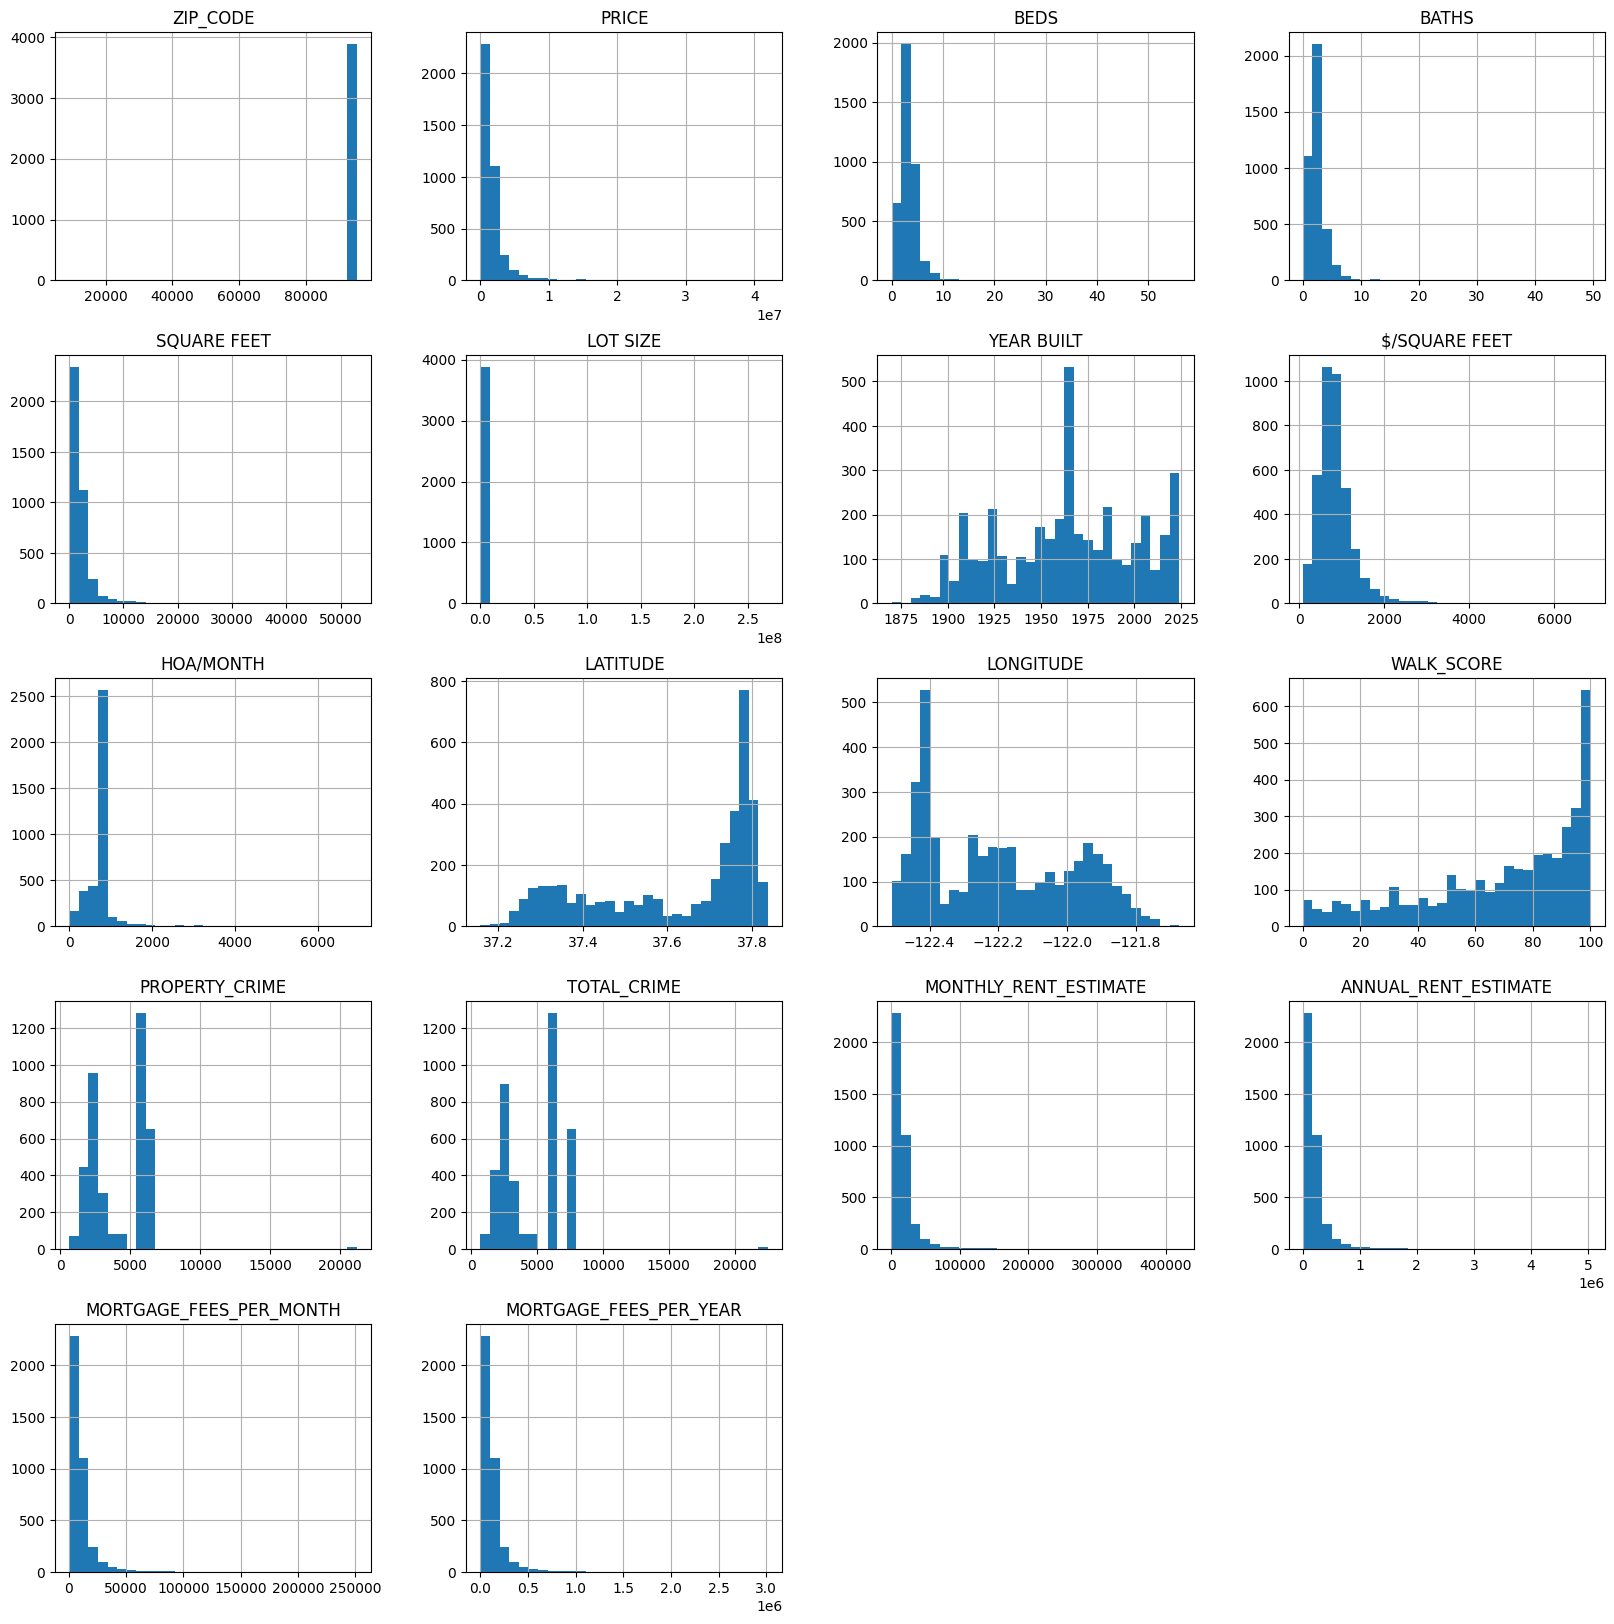

In [19]:
data.hist(bins=30,figsize=[20,20])

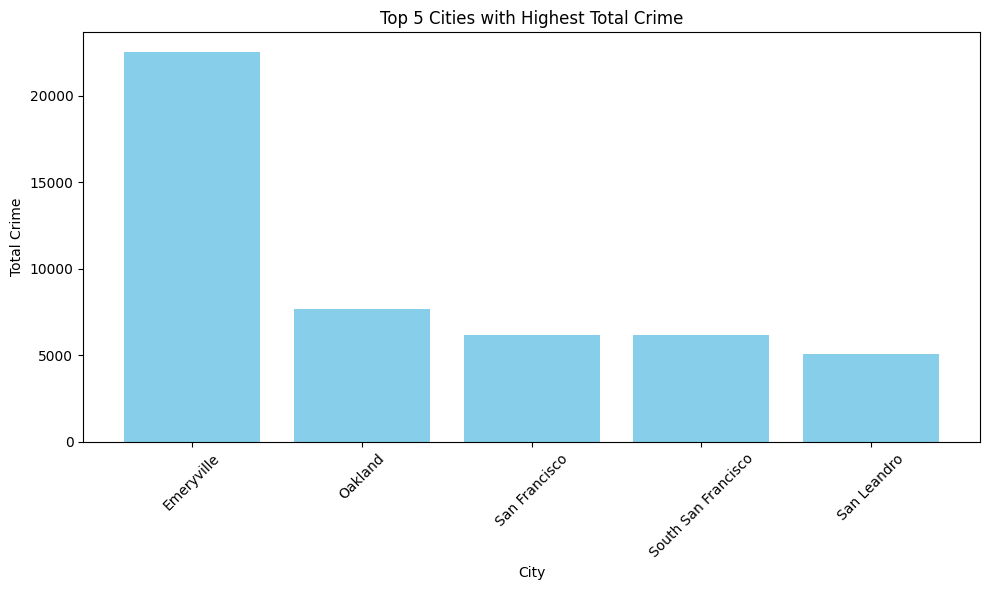

In [20]:
data_unique = data.drop_duplicates(subset=['CITY'], keep='first')
top_5_cities = data_unique.nlargest(5, 'TOTAL_CRIME')[['CITY', 'TOTAL_CRIME']]
plt.figure(figsize=(10,6))
plt.bar(top_5_cities['CITY'], top_5_cities['TOTAL_CRIME'], color='skyblue')
plt.title('Top 5 Cities with Highest Total Crime')
plt.xlabel('City')
plt.ylabel('Total Crime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



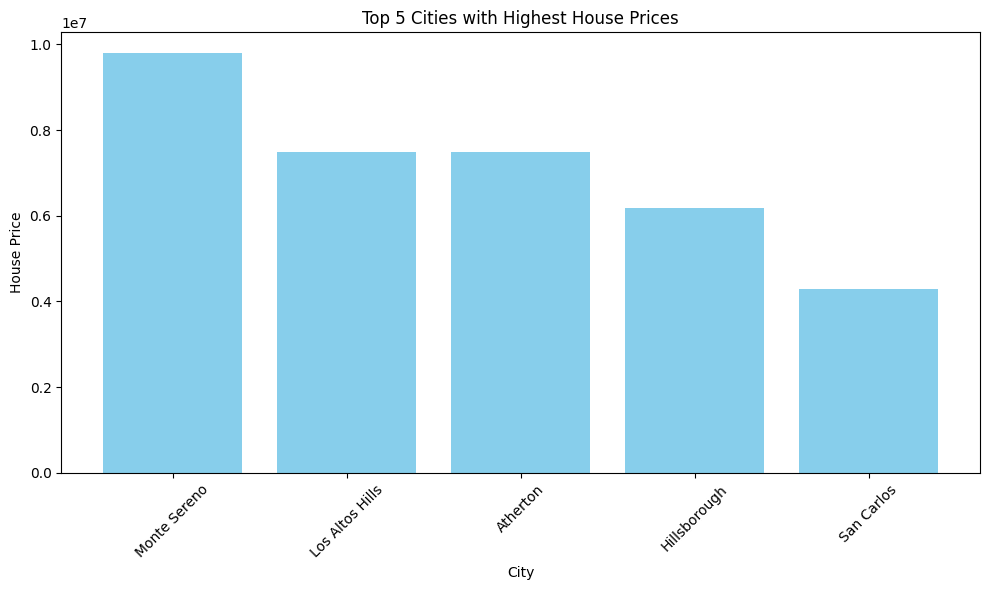

In [21]:
top_5_cities_house_price = data_unique.nlargest(5, 'PRICE')[['CITY', 'PRICE']]
plt.figure(figsize=(10,6))
plt.bar(top_5_cities_house_price['CITY'], top_5_cities_house_price['PRICE'], color='skyblue')
plt.title('Top 5 Cities with Highest House Prices')
plt.xlabel('City')
plt.ylabel('House Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3886 non-null   object 
 1   ADDRESS                  3886 non-null   object 
 2   CITY                     3886 non-null   object 
 3   STATE OR PROVINCE        3886 non-null   object 
 4   ZIP_CODE                 3886 non-null   int64  
 5   PRICE                    3886 non-null   float64
 6   BEDS                     3886 non-null   float64
 7   BATHS                    3886 non-null   float64
 8   LOCATION                 3886 non-null   object 
 9   SQUARE FEET              3886 non-null   float64
 10  LOT SIZE                 3886 non-null   float64
 11  YEAR BUILT               3886 non-null   float64
 12  $/SQUARE FEET            3886 non-null   float64
 13  HOA/MONTH                3886 non-null   float64
 14  LATITUDE                

In [23]:
ds1=data.copy()

In [24]:
data1=data.copy()

#**Clustering**

In [25]:

data1= data1[['LATITUDE', 'LONGITUDE', 'PROPERTY_CRIME']]
data1.describe()

,LATITUDE,LONGITUDE,PROPERTY_CRIME
count,3886.000000,3886.000000,3886.000000
mean,37.620953,-122.197175,4171.646680
std,0.192845,0.211426,2073.223331
min,37.157717,-122.510444,658.000000
25%,37.439249,-122.409526,2420.000000
50%,37.727374,-122.220830,5506.000000
75%,37.781117,-121.998388,5506.000000
max,37.838245,-121.672645,21187.000000


In [26]:

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
data_s=pd.DataFrame(data_scaled).describe()
data_s


,0,1,2
count,3.886000e+03,3.886000e+03,3.886000e+03
mean,2.276077e-14,-2.713447e-15,-1.170220e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.402426e+00,-1.481886e+00,-1.694993e+00
25%,-9.423486e-01,-1.004502e+00,-8.449992e-01
50%,5.519215e-01,-1.118978e-01,6.436957e-01
75%,8.306401e-01,9.403386e-01,6.436957e-01
max,1.126919e+00,2.481229e+00,8.208254e+00


For clustering, the dataset is standardized to ensure that all features have equal weight, which is crucial for clustering algorithms that rely on distance measures. After standardization, descriptive statistics of the standardized data are obtained and stored to understand its distribution and characteristics.

## **GMM Clustering**

### Silhouette score to find optimal number of clusters

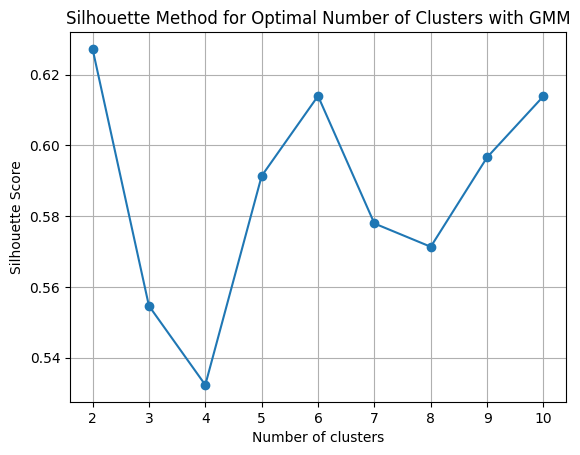

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_avg = []
n_clusters_range = range(2, 11)  # Start from 2 as silhouette score is not defined for a single cluster

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0).fit(data_scaled)
    cluster_labels = gmm.predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure()
plt.plot(n_clusters_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters with GMM')
plt.grid(True)
plt.show()


In [28]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [29]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=0).fit(data_scaled)
labels = gmm.predict(data_scaled)
sil_score = silhouette_score(data_scaled, labels)
sil_score

0.5546257572616882

In [30]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance[0]), 2 * np.sqrt(covariance[1])

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


In [31]:
from matplotlib.lines import Line2D

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    cluster_info = []
    unique_labels = np.unique(labels)
    cmap = plt.cm.get_cmap('viridis', len(unique_labels))

    if label:
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

        for i, label in enumerate(unique_labels):
            cluster_size = sum(labels == label)
            cluster_info.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}: {cluster_size} points', markersize=10, markerfacecolor=cmap(i / len(unique_labels))))

        for i, (pos, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
            if covar.shape == (2, 2):
                U, s, Vt = np.linalg.svd(covar)
                angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
                width, height = 2 * np.sqrt(s)
            else:
                angle = 0
                width, height = 2 * np.sqrt(covar[0]), 2 * np.sqrt(covar[1])

            draw_ellipse(pos, covar, alpha=0.2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    ax.axis('equal')

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    # Adding a legend with cluster information
    ax.legend(handles=cluster_info, loc='upper right')


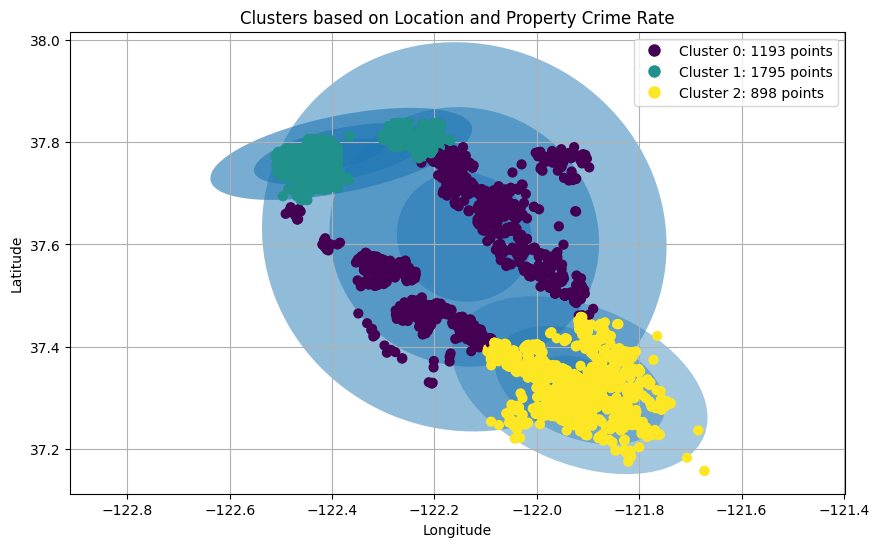

In [32]:
optimal_clusters = 3  # Replace with the optimal number found in step 3
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0).fit(data_scaled)
data1['Cluster'] = gmm.predict(data_scaled)

# Extract the LONGITUDE and LATITUDE columns for plotting
X = data1[['LONGITUDE', 'LATITUDE']].values

# Plot the GMM results
plt.figure(figsize=(10, 6))
plot_gmm(gmm, X)

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters based on Location and Property Crime Rate')
plt.grid(True)

# Show the plot
plt.show()

In [33]:
cluster_counts = data1['Cluster'].value_counts()
print(cluster_counts)

1    2078
2     932
0     876
Name: Cluster, dtype: int64


In [34]:
cluster_stats = data1.groupby('Cluster')['PROPERTY_CRIME'].describe()
print(cluster_stats)

          count         mean          std     min     25%     50%     75%  \
Cluster                                                                     
0         876.0  2044.720320   663.902176   658.0  1536.0  1878.0  2285.0   
1        2078.0  5782.719923  1465.040136  1734.0  5506.0  5506.0  6421.0   
2         932.0  2578.703863   379.025238  1524.0  2420.0  2420.0  2549.0   

             max  
Cluster           
0         3863.0  
1        21187.0  
2         3620.0  


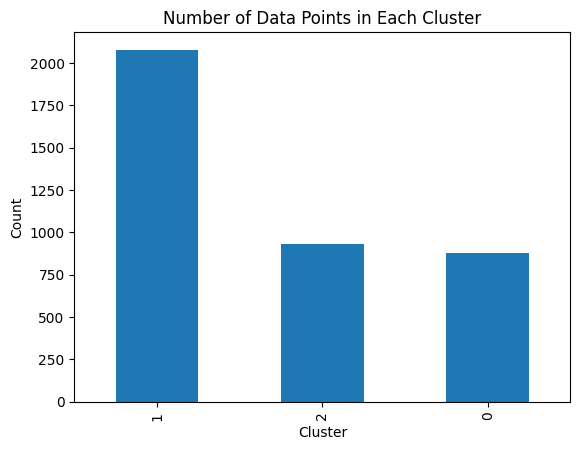

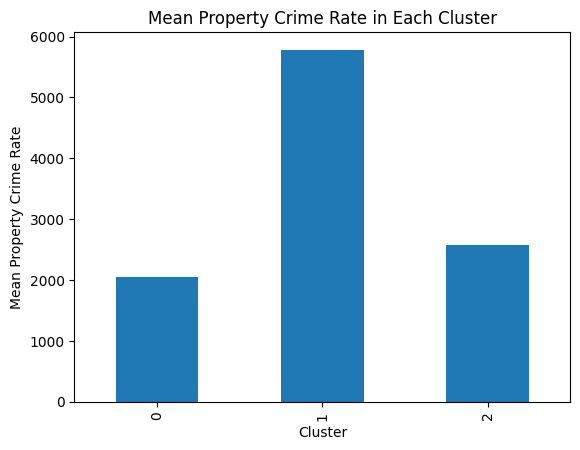

In [35]:
cluster_counts.plot(kind='bar')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plotting the mean property crime rate in each cluster
cluster_stats['mean'].plot(kind='bar')
plt.title('Mean Property Crime Rate in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Property Crime Rate')
plt.show()

**Clusterwise data distribution** <br>
We can infer from the above results that cluster 1 has highest number of property crime rate unfortunately marking it as the neighborhood with the highest crime rate. <br>
Cluster 0 has the lowest number of crime rates  making it a potentially safer and more desirable area for residence or investment.

##KMeans Clustering <br>

### Elbow Method to find  optimal number of clusters

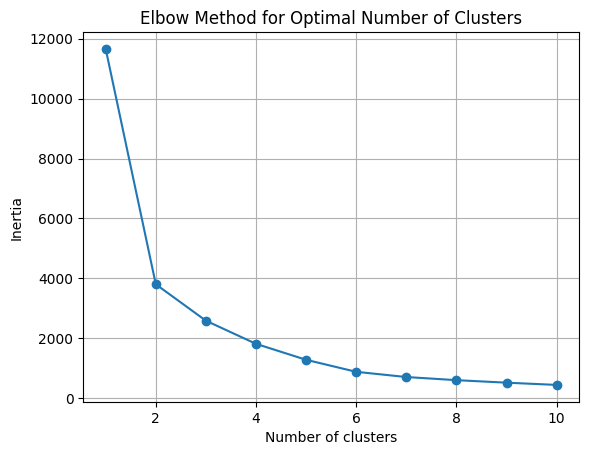

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data matrix
inertia = []
n_clusters_range = range(1, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure()
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

### Silhoutte score to find  optimal number of clusters

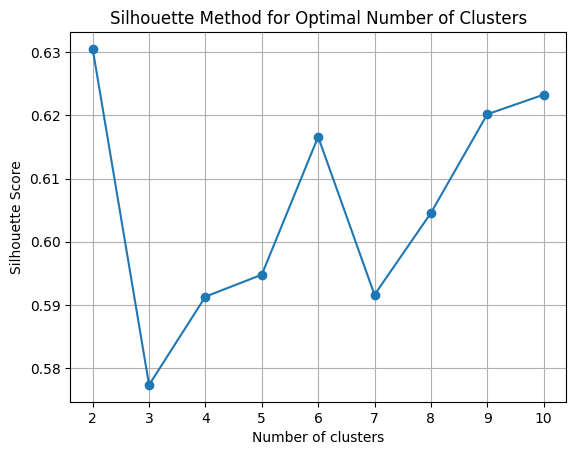

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming data_scaled is your data matrix
silhouette_avg = []
n_clusters_range = range(2, 11)  # Start from 2 as silhouette score is not defined for a single cluster

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure()
plt.plot(n_clusters_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

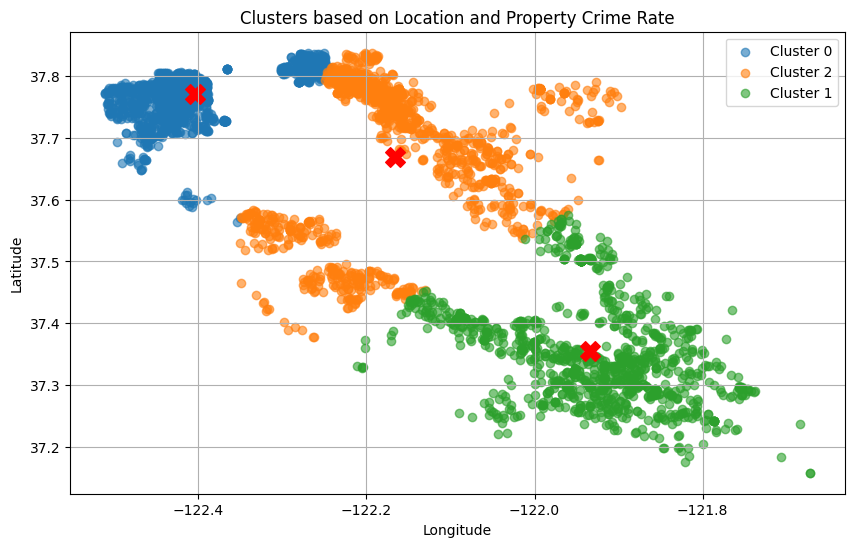

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data1['Cluster'] = kmeans.fit_predict(data1[['LONGITUDE', 'LATITUDE']])  # Adjust the features as necessary

# Get the count of data points in each cluster
cluster_counts = data1['Cluster'].value_counts()

plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for each cluster
clusters = data1['Cluster'].unique()
for cluster in clusters:
    cluster_data = data1[data1['Cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUDE'], cluster_data['LATITUDE'], label=f'Cluster {cluster}', alpha=0.6)

# Plot the centroids and annotate with the count of data points in each cluster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X')


# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters based on Location and Property Crime Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [39]:

cluster_counts = data1['Cluster'].value_counts()
cluster_counts


0    1607
2    1165
1    1114
Name: Cluster, dtype: int64

We can infer from the above clustering results that the properties are distinctly grouped based on their geographical location and property crime rates, which can serve as a significant indicator for potential homebuyers and investors.

From our analysis, it is evident that Cluster 0 houses the majority of the properties, unfortunately marking it as the neighborhood with the highest crime rate. This area might not be recommended for individuals looking for safer environments to reside in or invest.

On the other hand, Cluster 2 represents a neighborhood with a significantly lower crime rate, making it a potentially safer and more desirable area for residence or investment. It stands as a beacon of safety and tranquility amidst the other clusters.

Cluster 1, while having a slightly higher crime rate compared to Cluster 2, still maintains a relatively safe environment, positioning itself as a viable option for those willing to compromise slightly on safety for other benefits the neighborhood might offer.

Therefore, for individuals prioritizing safety in their home-buying or investment decisions, properties located within Cluster 2 would be the most recommended, followed by those in Cluster 1, while properties in Cluster 0 should perhaps be approached with caution.

### Compare results of KMeans and GMM
We can see number of optimal clusters using Silhoutte method in both the clustering methods are same that is 3, and so the results are accurate in finding the most safe neighbourhood with less crime and safest place to live. Both methods predicts the neighbourhood with the most crimes and less safe place for people to live or investors to invest. We can infer from the above clustering results that the properties are distinctly grouped based on their geographical location and property crime rates, which can serve as a significant indicator for potential homebuyers and investors.

##**Fractal clustering**

**Possible Latent Variables**
PRICE, <br>
$/SQUARE FEET <br>
TOTAL_CRIME, <br>
PROPERTY_CRIME, <br>
WALK_SCORE, <br>
SCHOOL_RANKING <br>
ANNUAL_RENT_ESTIMATE <br>

Fractal Clustering on Latent Variables Fractal Clustering is performed using recursive k-means






In [40]:
fractal_df = data.copy()

In [41]:
fractal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3886 non-null   object 
 1   ADDRESS                  3886 non-null   object 
 2   CITY                     3886 non-null   object 
 3   STATE OR PROVINCE        3886 non-null   object 
 4   ZIP_CODE                 3886 non-null   int64  
 5   PRICE                    3886 non-null   float64
 6   BEDS                     3886 non-null   float64
 7   BATHS                    3886 non-null   float64
 8   LOCATION                 3886 non-null   object 
 9   SQUARE FEET              3886 non-null   float64
 10  LOT SIZE                 3886 non-null   float64
 11  YEAR BUILT               3886 non-null   float64
 12  $/SQUARE FEET            3886 non-null   float64
 13  HOA/MONTH                3886 non-null   float64
 14  LATITUDE                

#### **PRICE + PROPERTY_CRIME**

In [42]:
def plot_cluster(data, max_loop=50):
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = fractal_df.iloc[:,[5,17]]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

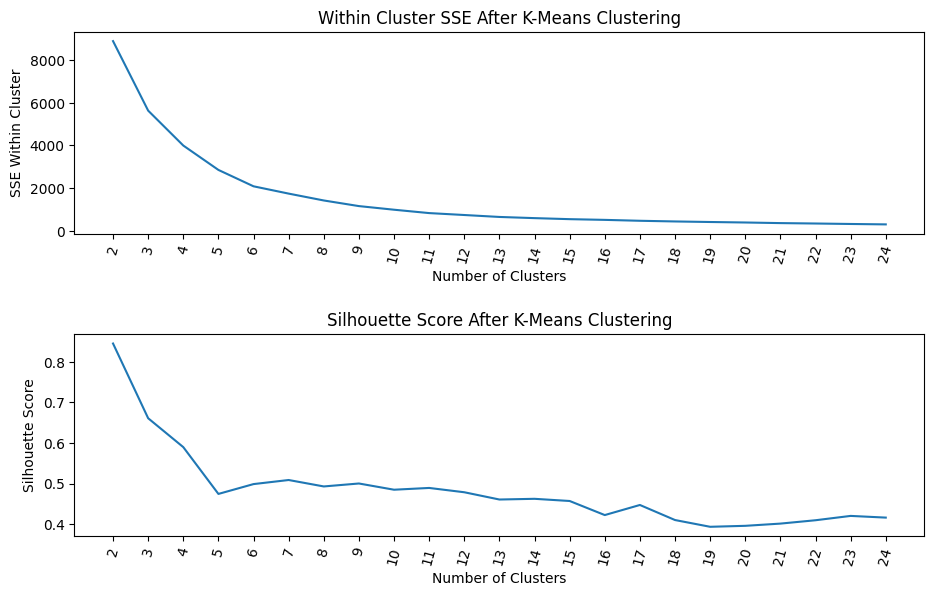

In [43]:
plot_cluster(fractal_df, max_loop=25)

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import numpy as np

def apply_cluster(fractal_df, clusters=4):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        fractal_df.drop('cluster', axis=1, inplace=True)
    except:
        pass

    X = fractal_df.iloc[:, [5, 17]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = silhouette_score(X_rb, kmeans.labels_, random_state=10)
    fractal_df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("Clustering performance")
    print("-----------------------------------")
    print("Silhouette score: " + str(score.round(2)))
    rounded_sse_within_cluster = round(sse_within_cluster, 2)
    print("SSE within cluster: " + str(rounded_sse_within_cluster))

    cluster_centers = kmeans.cluster_centers_
    euclidean_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            euclidean_distances[i][j] = np.linalg.norm(cluster_centers[i] - cluster_centers[j])

    print("\nEuclidean distances between cluster centers:")
    print(euclidean_distances)

    # Calculate the fractal distance between cluster centers
    fractal_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            fractal_distances[i][j] = abs(score - euclidean_distances[i][j])

    print("\nFractal distances between cluster centers:")
    print(fractal_distances)

    # Create a DataFrame to compare distances
    distances_df = pd.DataFrame({'Euclidean Distance': euclidean_distances.flatten(),
                                 'Fractal Distance': fractal_distances.flatten()})

    print("\nComparison of Distances:")
    print(distances_df)

    return fractal_df

In [45]:
first_trial = apply_cluster(fractal_df, clusters=4)

Clustering performance
-----------------------------------
Silhouette score: 0.59
SSE within cluster: 3990.32

Euclidean distances between cluster centers:
[[ 0.          2.62740058 25.40615672  7.19965634]
 [ 2.62740058  0.         28.03029119  9.82324471]
 [25.40615672 28.03029119  0.         18.20706041]
 [ 7.19965634  9.82324471 18.20706041  0.        ]]

Fractal distances between cluster centers:
[[ 0.58973864  2.03766194 24.81641808  6.6099177 ]
 [ 2.03766194  0.58973864 27.44055255  9.23350608]
 [24.81641808 27.44055255  0.58973864 17.61732177]
 [ 6.6099177   9.23350608 17.61732177  0.58973864]]

Comparison of Distances:
    Euclidean Distance  Fractal Distance
0             0.000000          0.589739
1             2.627401          2.037662
2            25.406157         24.816418
3             7.199656          6.609918
4             2.627401          2.037662
5             0.000000          0.589739
6            28.030291         27.440553
7             9.823245          9.23

In [46]:
cluster_df = (
    first_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "PROPERTY_CRIME":"mean"})
    .sort_values('PROPERTY_CRIME')
    .reset_index()
)

cluster_df

,cluster,PRICE,PROPERTY_CRIME
0,2,3.342714e+07,3231.857143
1,0,4.210726e+06,3760.058947
2,3,1.249027e+07,3844.971429
3,1,1.194493e+06,4239.118176


Selecting cluster as 2 as it has least PROPERTY_CRIME

In [47]:
df_sub = fractal_df.query("cluster==2").reset_index(drop=True)
df_sub.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Single Family Residential,2898 Broadway St,San Francisco,CA,94115,32000000.0,10.0,6.5,San Francisco,11155.0,...,37.793379,-122.444733,82.0,5506.0,6175.0,320000.0,3840000.0,191607.0,2299284.0,2
1,Single Family Residential,3630 Jackson St,San Francisco,CA,94118,36000000.0,8.0,7.5,San Francisco,12022.0,...,37.790237,-122.454682,92.0,5506.0,6175.0,360000.0,4320000.0,215558.0,2586696.0,2
2,Single Family Residential,2799 Broadway,San Francisco,CA,94115,35000000.0,7.0,8.0,San Francisco,11635.0,...,37.793011,-122.442933,89.0,5506.0,6175.0,350000.0,4200000.0,209570.0,2514840.0,2
3,Other,110-150 Charter St,Redwood City,CA,94061,34000000.0,0.0,0.0,REDWOOD CITY,0.0,...,37.476355,-122.217828,88.0,1536.0,1752.0,340000.0,4080000.0,203583.0,2442996.0,2
4,Single Family Residential,30 Atherton Ave,Atherton,CA,94027,42000000.0,7.0,9.0,ATHERTON,13525.0,...,37.461005,-122.202318,40.0,1523.0,1689.0,420000.0,5040000.0,251484.0,3017808.0,2


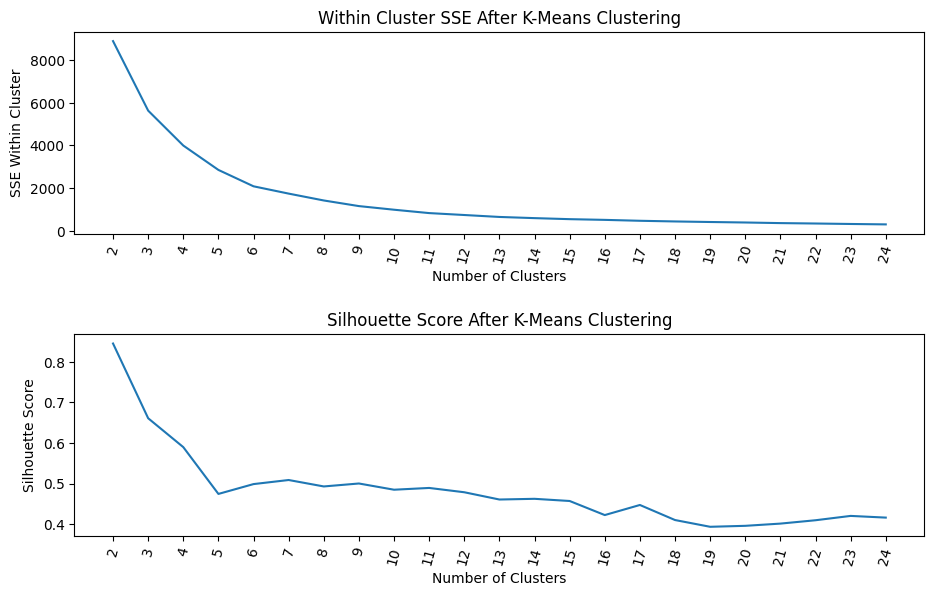

In [48]:
plot_cluster(df_sub, max_loop=25)

In [49]:
second_trial = apply_cluster(df_sub, clusters=2)

Clustering performance
-----------------------------------
Silhouette score: 0.37
SSE within cluster: 4.61

Euclidean distances between cluster centers:
[[0.         1.93986538]
 [1.93986538 0.        ]]

Fractal distances between cluster centers:
[[0.37156197 1.56830341]
 [1.56830341 0.37156197]]

Comparison of Distances:
   Euclidean Distance  Fractal Distance
0            0.000000          0.371562
1            1.939865          1.568303
2            1.939865          1.568303
3            0.000000          0.371562


In [50]:
cluster_sub1_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "PROPERTY_CRIME":"mean"})
    .sort_values('PROPERTY_CRIME')
    .reset_index()
)

cluster_sub1_perf_df

,cluster,PRICE,PROPERTY_CRIME
0,1,27495000.0,1523.0
1,0,35800000.0,3915.4


##### **Golden cluster**

In [51]:
golden_cluster = second_trial.query("cluster == 1").reset_index(drop=True)
golden_cluster.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Single Family Residential,76 Almendral Ave,Atherton,CA,94027,24995000.0,6.0,5.5,ATHERTON,10011.0,...,37.459977,-122.208591,23.0,1523.0,1689.0,249950.0,2999400.0,149663.0,1795956.0,1
1,Single Family Residential,35 Barry Ln,Atherton,CA,94027,29995000.0,6.0,7.5,ATHERTON,11257.0,...,37.451527,-122.206397,9.0,1523.0,1689.0,299950.0,3599400.0,179602.0,2155224.0,1


In [52]:
grouped_by_city = golden_cluster.groupby('CITY')

mean_property_crime_by_city = grouped_by_city['PROPERTY_CRIME'].mean()
print(" mean PROPERTY_CRIME by city:")
print(mean_property_crime_by_city)

 mean PROPERTY_CRIME by city:
CITY
Atherton    1523.0
Name: PROPERTY_CRIME, dtype: float64


In the "Golden Cluster," it's notable that Atherton stand out with the lowest mean property crime rates among the cities,  mean property crime rate of 1523 This suggests  city Atherton within the cluster have relatively lower levels of reported property crime compared to the others, making  potentially attractive for residents concerned about safety.

#### **PRICE+WALK_SCORE**


In [53]:
def plot_cluster(data, max_loop=50):
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = fractal_df.iloc[:,[5,16]]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

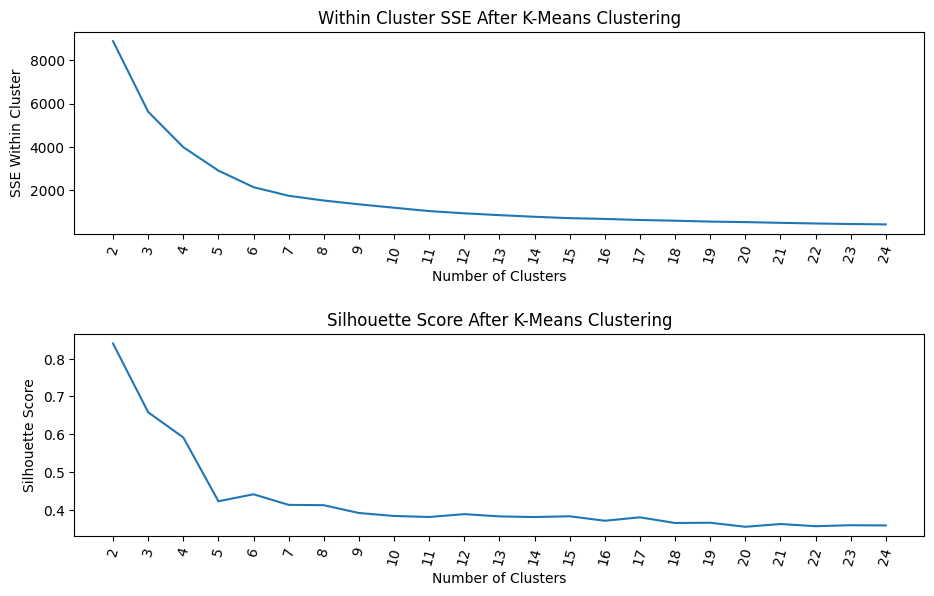

In [54]:
plot_cluster(fractal_df, max_loop=25)

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import numpy as np

def apply_cluster(fractal_df, clusters=4):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        fractal_df.drop('cluster', axis=1, inplace=True)
    except:
        pass

    X = fractal_df.iloc[:, [5, 16]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = silhouette_score(X_rb, kmeans.labels_, random_state=10)
    fractal_df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("Clustering performance")
    print("-----------------------------------")
    print("Silhouette score: " + str(score.round(2)))
    rounded_sse_within_cluster = round(sse_within_cluster, 2)
    print("SSE within cluster: " + str(rounded_sse_within_cluster))

    cluster_centers = kmeans.cluster_centers_
    euclidean_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            euclidean_distances[i][j] = np.linalg.norm(cluster_centers[i] - cluster_centers[j])

    print("\nEuclidean distances between cluster centers:")
    print(euclidean_distances)

    # Calculate the fractal distance between cluster centers
    fractal_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            fractal_distances[i][j] = abs(score - euclidean_distances[i][j])

    print("\nFractal distances between cluster centers:")
    print(fractal_distances)

    # Create a DataFrame to compare distances
    distances_df = pd.DataFrame({'Euclidean Distance': euclidean_distances.flatten(),
                                 'Fractal Distance': fractal_distances.flatten()})

    print("\nComparison of Distances:")
    print(distances_df)

    return fractal_df

In [56]:
first_trial = apply_cluster(fractal_df, clusters=4)

Clustering performance
-----------------------------------
Silhouette score: 0.59
SSE within cluster: 3992.22

Euclidean distances between cluster centers:
[[ 0.          9.86952683  2.66536156 28.02369399]
 [ 9.86952683  0.          7.20418184 18.15418362]
 [ 2.66536156  7.20418184  0.         25.35836203]
 [28.02369399 18.15418362 25.35836203  0.        ]]

Fractal distances between cluster centers:
[[ 0.5912688   9.27825802  2.07409276 27.43242519]
 [ 9.27825802  0.5912688   6.61291304 17.56291482]
 [ 2.07409276  6.61291304  0.5912688  24.76709322]
 [27.43242519 17.56291482 24.76709322  0.5912688 ]]

Comparison of Distances:
    Euclidean Distance  Fractal Distance
0             0.000000          0.591269
1             9.869527          9.278258
2             2.665362          2.074093
3            28.023694         27.432425
4             9.869527          9.278258
5             0.000000          0.591269
6             7.204182          6.612913
7            18.154184         17.56

In [57]:
cluster_df = (
    first_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values("WALK_SCORE")
    .reset_index()
)

cluster_df

,cluster,PRICE,WALK_SCORE
0,3,3.342714e+07,60.428571
1,1,1.255027e+07,65.391304
2,2,4.265708e+06,67.709957
3,0,1.200755e+06,69.029869


In [58]:
df_sub = fractal_df.query("cluster==0").reset_index(drop=True)
df_sub.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000.0,1.0,1.0,Adams Point,971.0,...,37.817373,-122.254688,84.0,6421.0,7692.0,5350.0,64200.0,3203.0,38436.0,0
1,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000.0,1.0,1.0,Upper Rockridge,1265.0,...,37.835305,-122.221226,30.0,6421.0,7692.0,10750.0,129000.0,6437.0,77244.0,0
2,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000.0,1.0,1.0,Emeryville Bordr,1051.0,...,37.835468,-122.276067,90.0,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,0
3,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000.0,1.0,1.0,Adams Point,715.0,...,37.814753,-122.255872,84.0,6421.0,7692.0,4390.0,52680.0,2629.0,31548.0,0
4,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000.0,1.0,1.0,Rose Garden,757.0,...,37.820653,-122.249832,86.0,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,0


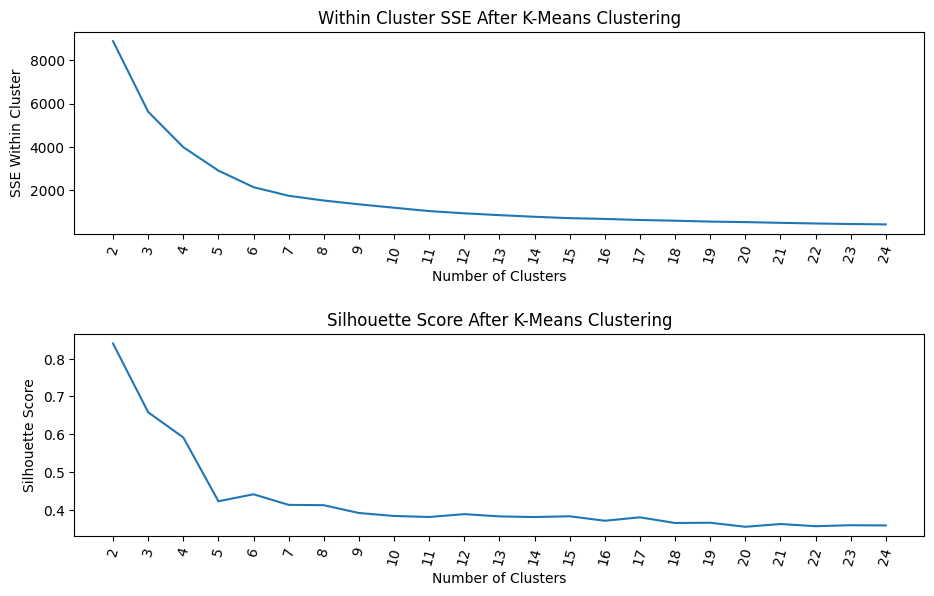

In [59]:
plot_cluster(df_sub, max_loop=25)

In [60]:
second_trial = apply_cluster(df_sub, clusters=4)

Clustering performance
-----------------------------------
Silhouette score: 0.4
SSE within cluster: 874.12

Euclidean distances between cluster centers:
[[0.         1.19705181 1.38959257 1.66319536]
 [1.19705181 0.         1.78728977 1.15097325]
 [1.38959257 1.78728977 0.         1.15437727]
 [1.66319536 1.15097325 1.15437727 0.        ]]

Fractal distances between cluster centers:
[[0.40210153 0.79495028 0.98749103 1.26109383]
 [0.79495028 0.40210153 1.38518823 0.74887171]
 [0.98749103 1.38518823 0.40210153 0.75227574]
 [1.26109383 0.74887171 0.75227574 0.40210153]]

Comparison of Distances:
    Euclidean Distance  Fractal Distance
0             0.000000          0.402102
1             1.197052          0.794950
2             1.389593          0.987491
3             1.663195          1.261094
4             1.197052          0.794950
5             0.000000          0.402102
6             1.787290          1.385188
7             1.150973          0.748872
8             1.389593       

In [61]:
cluster_sub1_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values('WALK_SCORE')
    .reset_index()
)

cluster_sub1_perf_df

,cluster,PRICE,WALK_SCORE
0,2,1.747994e+06,29.240175
1,3,7.938589e+05,39.784252
2,0,1.835789e+06,84.694021
3,1,8.199139e+05,85.743937


In [62]:

data_sub2 = second_trial.query("cluster == 1").reset_index(drop=True)
data_sub2

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000.0,1.0,1.0,Adams Point,971.0,...,37.817373,-122.254688,84.0,6421.0,7692.0,5350.0,64200.0,3203.0,38436.0,1
1,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000.0,1.0,1.0,Emeryville Bordr,1051.0,...,37.835468,-122.276067,90.0,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,1
2,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000.0,1.0,1.0,Adams Point,715.0,...,37.814753,-122.255872,84.0,6421.0,7692.0,4390.0,52680.0,2629.0,31548.0,1
3,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000.0,1.0,1.0,Rose Garden,757.0,...,37.820653,-122.249832,86.0,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,1
4,Condo/Co-op,585 9Th St #305,Oakland,CA,94607,475000.0,1.0,1.0,Downtown,736.0,...,37.801934,-122.276431,99.0,6421.0,7692.0,4750.0,57000.0,2844.0,34128.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,Mobile/Manufactured Home,60 WILSON #55,Milpitas,CA,95035,420000.0,3.0,2.0,MILPITAS,1190.0,...,37.458385,-121.913997,83.0,2663.0,2787.0,4200.0,50400.0,2515.0,30180.0,1
1398,Condo/Co-op,368 Rio Verde Pl #4,Milpitas,CA,95035,596000.0,2.0,1.0,MILPITAS,924.0,...,37.424022,-121.911717,78.0,2663.0,2787.0,5960.0,71520.0,3569.0,42828.0,1
1399,Mobile/Manufactured Home,60 Wilson Way #91,Milpitas,CA,95035,449900.0,3.0,2.0,MILPITAS,1220.0,...,37.458385,-121.913997,83.0,2663.0,2787.0,4499.0,53988.0,2694.0,32328.0,1
1400,Mobile/Manufactured Home,1515 N Milpitas Blvd #36,Milpitas,CA,95035,329000.0,2.0,2.0,MILPITAS,1040.0,...,37.453417,-121.913486,75.0,2663.0,2787.0,3290.0,39480.0,1970.0,23640.0,1


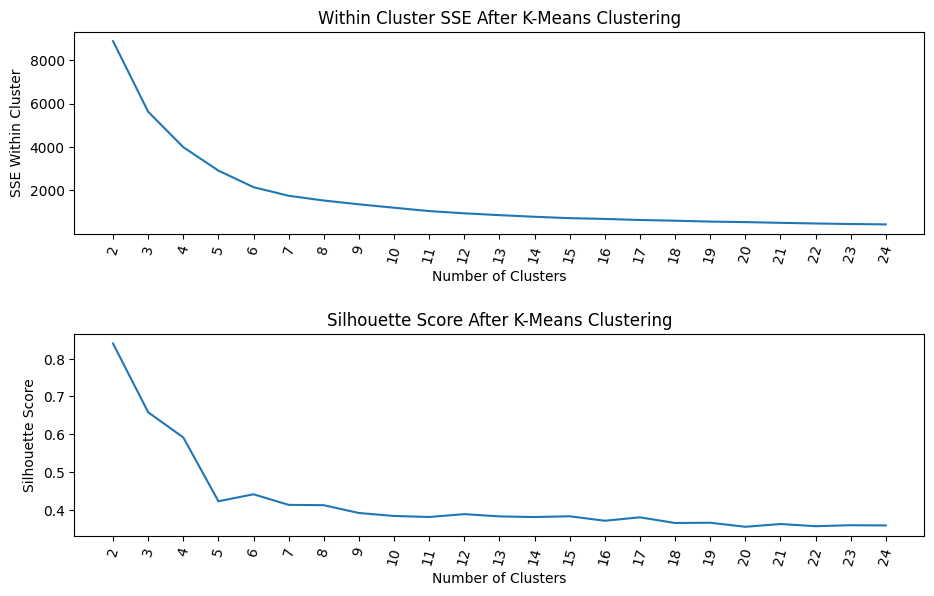

In [63]:
plot_cluster(data_sub2, max_loop=25)

In [64]:
thirdTrial = apply_cluster(data_sub2, clusters=4)

Clustering performance
-----------------------------------
Silhouette score: 0.39
SSE within cluster: 300.36

Euclidean distances between cluster centers:
[[0.         1.04195921 1.4551291  1.03944798]
 [1.04195921 0.         1.1252806  1.57010705]
 [1.4551291  1.1252806  0.         1.07672466]
 [1.03944798 1.57010705 1.07672466 0.        ]]

Fractal distances between cluster centers:
[[0.3908335  0.6511257  1.06429559 0.64861448]
 [0.6511257  0.3908335  0.7344471  1.17927355]
 [1.06429559 0.7344471  0.3908335  0.68589115]
 [0.64861448 1.17927355 0.68589115 0.3908335 ]]

Comparison of Distances:
    Euclidean Distance  Fractal Distance
0             0.000000          0.390834
1             1.041959          0.651126
2             1.455129          1.064296
3             1.039448          0.648614
4             1.041959          0.651126
5             0.000000          0.390834
6             1.125281          0.734447
7             1.570107          1.179274
8             1.455129      

In [65]:
cluster_sub2_df = (
    thirdTrial
    .groupby('cluster')
    .agg({"PRICE":"mean", "WALK_SCORE":"mean"})
    .sort_values('WALK_SCORE')
    .reset_index()
)

cluster_sub2_df

,cluster,PRICE,WALK_SCORE
0,0,1.004840e+06,74.498361
1,3,5.537690e+05,75.437288
2,1,1.089778e+06,92.920596
3,2,6.027587e+05,94.711779


##### **Golden clusters**

In [66]:

golden_cluster = thirdTrial.query("cluster == 2").reset_index(drop=True)
golden_cluster

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000.0,1.0,1.0,Emeryville Bordr,1051.0,...,37.835468,-122.276067,90.0,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,2
1,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000.0,1.0,1.0,Rose Garden,757.0,...,37.820653,-122.249832,86.0,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,2
2,Condo/Co-op,585 9Th St #305,Oakland,CA,94607,475000.0,1.0,1.0,Downtown,736.0,...,37.801934,-122.276431,99.0,6421.0,7692.0,4750.0,57000.0,2844.0,34128.0,2
3,Condo/Co-op,850 W Grand Ave Unit B,Oakland,CA,94607,479000.0,1.0,1.0,Alameda County,983.0,...,37.814190,-122.277152,92.0,6421.0,7692.0,4790.0,57480.0,2868.0,34416.0,2
4,Condo/Co-op,2201 West St Unit B,Oakland,CA,94612,475000.0,1.0,1.0,West Oakland,844.0,...,37.813040,-122.276434,92.0,6421.0,7692.0,4750.0,57000.0,2844.0,34128.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Condo/Co-op,1 Baldwin Ave #217,San Mateo,CA,94401,650000.0,2.0,2.0,SAN MATEO,1400.0,...,37.566479,-122.328046,95.0,2091.0,2342.0,6500.0,78000.0,3892.0,46704.0,2
395,Condo/Co-op,1 Baldwin Ave #517,San Mateo,CA,94401,765000.0,2.0,2.0,SAN MATEO,1429.0,...,37.566479,-122.328046,95.0,2091.0,2342.0,7650.0,91800.0,4581.0,54972.0,2
396,Condo/Co-op,1 Baldwin Ave #201,San Mateo,CA,94401,260000.0,1.0,1.0,SAN MATEO,981.0,...,37.566479,-122.328046,95.0,2091.0,2342.0,2600.0,31200.0,1557.0,18684.0,2
397,Condo/Co-op,1 Baldwin Ave #411,San Mateo,CA,94401,295000.0,2.0,2.0,SAN MATEO,1140.0,...,37.566479,-122.328046,95.0,2091.0,2342.0,2950.0,35400.0,1766.0,21192.0,2


In [67]:
grouped_by_city = golden_cluster.groupby('CITY')
mean_walk_score_by_city = grouped_by_city['WALK_SCORE'].mean()
top_5_cities = mean_walk_score_by_city.sort_values(ascending=False).head(5)

print("Top 5 cities with the highest mean walk score:")
print(top_5_cities)

Top 5 cities with the highest mean walk score:
CITY
San Francisco    97.112821
San Mateo        94.571429
Emeryville       93.166667
Redwood City     92.500000
Oakland          92.455224
Name: WALK_SCORE, dtype: float64


in the "golden cluster" analysis, San Francisco tops the walkability list with a score of 97.11. With San Mateo, Emeryville, Redwood City, and Oakland trailing closely, potential investors should consider the attractiveness of these pedestrian-friendly cities for long-term gains. Likewise, potential buyers might find these cities a sustainable choice for livability and future appreciation.

### ANNUAL_RENT_ESTIMATE+ TOTAL_CRIME

In [68]:
def plot_cluster(data, max_loop=50):
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = fractal_df.iloc[:,[20,18]]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

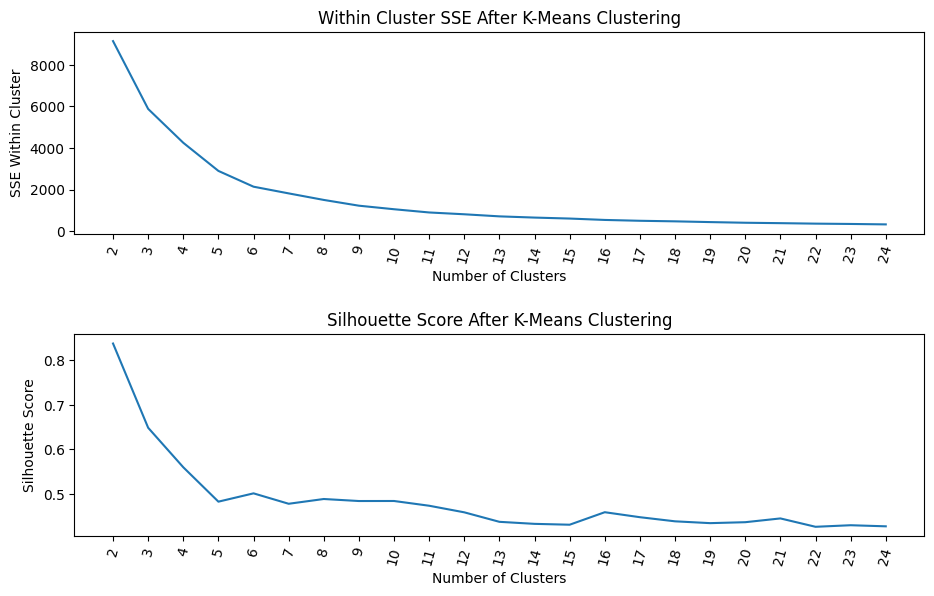

In [69]:
plot_cluster(fractal_df, max_loop=25)

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import numpy as np

def apply_cluster(fractal_df, clusters=4):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        fractal_df.drop('cluster', axis=1, inplace=True)
    except:
        pass

    X = fractal_df.iloc[:, [20, 18]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = silhouette_score(X_rb, kmeans.labels_, random_state=10)
    fractal_df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("Clustering performance")
    print("-----------------------------------")
    print("Silhouette score: " + str(score.round(2)))
    rounded_sse_within_cluster = round(sse_within_cluster, 2)
    print("SSE within cluster: " + str(rounded_sse_within_cluster))

    cluster_centers = kmeans.cluster_centers_
    euclidean_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            euclidean_distances[i][j] = np.linalg.norm(cluster_centers[i] - cluster_centers[j])

    print("\nEuclidean distances between cluster centers:")
    print(euclidean_distances)

    # Calculate the fractal distance between cluster centers
    fractal_distances = np.zeros((clusters, clusters))
    for i in range(clusters):
        for j in range(clusters):
            fractal_distances[i][j] = abs(score - euclidean_distances[i][j])

    print("\nFractal distances between cluster centers:")
    print(fractal_distances)

    # Create a DataFrame to compare distances
    distances_df = pd.DataFrame({'Euclidean Distance': euclidean_distances.flatten(),
                                 'Fractal Distance': fractal_distances.flatten()})

    print("\nComparison of Distances:")
    print(distances_df)

    return fractal_df

In [71]:
first_trial = apply_cluster(fractal_df, clusters=4)

Clustering performance
-----------------------------------
Silhouette score: 0.56
SSE within cluster: 4247.34

Euclidean distances between cluster centers:
[[ 0.          2.48491815  9.35616741 28.04325716]
 [ 2.48491815  0.          6.87857594 25.56525765]
 [ 9.35616741  6.87857594  0.         18.68729611]
 [28.04325716 25.56525765 18.68729611  0.        ]]

Fractal distances between cluster centers:
[[ 0.55991393  1.92500423  8.79625348 27.48334324]
 [ 1.92500423  0.55991393  6.31866201 25.00534373]
 [ 8.79625348  6.31866201  0.55991393 18.12738218]
 [27.48334324 25.00534373 18.12738218  0.55991393]]

Comparison of Distances:
    Euclidean Distance  Fractal Distance
0             0.000000          0.559914
1             2.484918          1.925004
2             9.356167          8.796253
3            28.043257         27.483343
4             2.484918          1.925004
5             0.000000          0.559914
6             6.878576          6.318662
7            25.565258         25.00

In [72]:
cluster_df = (
    first_trial
    .groupby('cluster')
    .agg({"ANNUAL_RENT_ESTIMATE":"mean", "TOTAL_CRIME":"mean"})
    .sort_values("TOTAL_CRIME")
    .reset_index()
)

cluster_df

,cluster,ANNUAL_RENT_ESTIMATE,TOTAL_CRIME
0,3,4.011257e+06,3620.571429
1,1,4.847000e+05,4157.378543
2,2,1.432555e+06,4277.675000
3,0,1.418386e+05,4859.114977


In [73]:
df_sub = fractal_df.query("cluster==3").reset_index(drop=True)
df_sub.head()

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Single Family Residential,2898 Broadway St,San Francisco,CA,94115,32000000.0,10.0,6.5,San Francisco,11155.0,...,37.793379,-122.444733,82.0,5506.0,6175.0,320000.0,3840000.0,191607.0,2299284.0,3
1,Single Family Residential,3630 Jackson St,San Francisco,CA,94118,36000000.0,8.0,7.5,San Francisco,12022.0,...,37.790237,-122.454682,92.0,5506.0,6175.0,360000.0,4320000.0,215558.0,2586696.0,3
2,Single Family Residential,2799 Broadway,San Francisco,CA,94115,35000000.0,7.0,8.0,San Francisco,11635.0,...,37.793011,-122.442933,89.0,5506.0,6175.0,350000.0,4200000.0,209570.0,2514840.0,3
3,Other,110-150 Charter St,Redwood City,CA,94061,34000000.0,0.0,0.0,REDWOOD CITY,0.0,...,37.476355,-122.217828,88.0,1536.0,1752.0,340000.0,4080000.0,203583.0,2442996.0,3
4,Single Family Residential,30 Atherton Ave,Atherton,CA,94027,42000000.0,7.0,9.0,ATHERTON,13525.0,...,37.461005,-122.202318,40.0,1523.0,1689.0,420000.0,5040000.0,251484.0,3017808.0,3


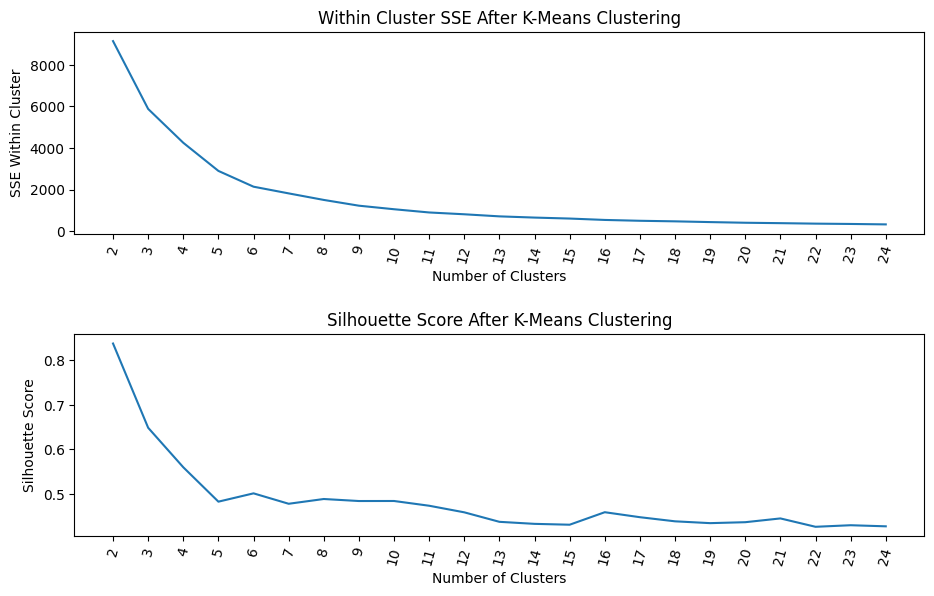

In [74]:
plot_cluster(df_sub, max_loop=25)

In [75]:
second_trial = apply_cluster(df_sub, clusters=2)

Clustering performance
-----------------------------------
Silhouette score: 0.37
SSE within cluster: 4.6

Euclidean distances between cluster centers:
[[0.         1.94053403]
 [1.94053403 0.        ]]

Fractal distances between cluster centers:
[[0.37290736 1.56762666]
 [1.56762666 0.37290736]]

Comparison of Distances:
   Euclidean Distance  Fractal Distance
0            0.000000          0.372907
1            1.940534          1.567627
2            1.940534          1.567627
3            0.000000          0.372907


#### **Golden clusters**



In [76]:
cluster_sub1_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"ANNUAL_RENT_ESTIMATE":"mean", "TOTAL_CRIME":"mean"})
    .sort_values('TOTAL_CRIME')
    .reset_index()
)

cluster_sub1_perf_df

,cluster,ANNUAL_RENT_ESTIMATE,TOTAL_CRIME
0,1,3299400.0,1689.0
1,0,4296000.0,4393.2


In [77]:
golden_cluster = thirdTrial.query("cluster == 1").reset_index(drop=True)
golden_cluster

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,cluster
0,Condo/Co-op,311 4Th St #121,Oakland,CA,94607,1049000.0,1.0,1.5,Jack London Sq,1115.0,...,37.796069,-122.272672,97.0,6421.0,7692.0,10490.0,125880.0,6281.0,75372.0,1
1,Condo/Co-op,311 Oak St #523,Oakland,CA,94607,899000.0,1.0,2.0,Jack London Sq,1672.0,...,37.794063,-122.268003,93.0,6421.0,7692.0,8990.0,107880.0,5383.0,64596.0,1
2,Single Family Residential,1451 Hampel St,Oakland,CA,94602,899000.0,3.0,2.0,Glenview,1306.0,...,37.805449,-122.221403,88.0,6421.0,7692.0,8990.0,107880.0,5383.0,64596.0,1
3,Single Family Residential,393 50Th St,Oakland,CA,94609,856000.0,3.0,1.0,Temescal,1296.0,...,37.835743,-122.258300,97.0,6421.0,7692.0,8560.0,102720.0,5125.0,61500.0,1
4,Single Family Residential,996 40th St,Emeryville,CA,94708,1100000.0,3.0,1.0,699 - Not Defined,1227.0,...,37.831286,-122.276409,94.0,21187.0,22528.0,11000.0,132000.0,6586.0,79032.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Condo/Co-op,10 Crystal Springs Rd #2413,San Mateo,CA,94402,1150000.0,2.0,2.0,SAN MATEO,1292.0,...,37.564663,-122.328488,95.0,2091.0,2342.0,11500.0,138000.0,6886.0,82632.0,1
399,Condo/Co-op,528 Everett Ave Unit A,Palo Alto,CA,94301,995000.0,2.0,2.0,Palo Alto,1044.0,...,37.450177,-122.161242,87.0,2962.0,3091.0,9950.0,119400.0,5958.0,71496.0,1
400,Condo/Co-op,631 Lytton Ave #1,Palo Alto,CA,94301,1299000.0,2.0,2.0,PALO ALTO,1167.0,...,37.450912,-122.159009,89.0,2962.0,3091.0,12990.0,155880.0,7778.0,93336.0,1
401,Condo/Co-op,500 Fulton St #102,Palo Alto,CA,94301,1199000.0,2.0,1.5,PALO ALTO,1111.0,...,37.450998,-122.156111,87.0,2962.0,3091.0,11990.0,143880.0,7179.0,86148.0,1


In [78]:
grouped_by_city = golden_cluster.groupby('CITY')
aggregated_data = grouped_by_city.agg({
    'ANNUAL_RENT_ESTIMATE': 'mean',
    'TOTAL_CRIME': 'mean'
})

# Sorting by total crime in ascending order to get lowest values first
cities_least_crime = aggregated_data.sort_values(by='TOTAL_CRIME').head(5)

print("Top 5 cities with the least total crime, alongside their annual rent estimate:")
print(cities_least_crime)



Top 5 cities with the least total crime, alongside their annual rent estimate:
              ANNUAL_RENT_ESTIMATE  TOTAL_CRIME
CITY                                           
Redwood City         132520.000000       1752.0
Daly City            128868.000000       1949.0
Fremont              142870.666667       2044.0
Millbrae             104160.000000       2342.0
San Mateo            127779.000000       2342.0


 in the "golden cluster" analysis for safety and affordability. Our results showed five standout cities with the lowest crime rates. Along with safety, we also considered their average yearly rent. These findings can guide those looking to invest or find a new home in safer and reasonably-priced areas

# Amalgamation and Classification

**Data Amalgamation 1:**

Initial dataset with target variable.

Added target variable to predict if the property is worth investing based on **HOA (Home Owner Association) fees  + Mortgage Fees < Rent** so the rental property investment is generating the maximum return on investment.


In [79]:
df=data.copy()
df['Invest_or_Not'] = np.where(df['MONTHLY_RENT_ESTIMATE']> (df['MORTGAGE_FEES_PER_MONTH']+df['HOA/MONTH']), 1, 0)
df

,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,Invest_or_Not
0,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000.0,1.0,1.0,Adams Point,971.0,...,37.817373,-122.254688,84.0,6421.0,7692.0,5350.0,64200.0,3203.0,38436.0,1
1,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000.0,1.0,1.0,Upper Rockridge,1265.0,...,37.835305,-122.221226,30.0,6421.0,7692.0,10750.0,129000.0,6437.0,77244.0,1
2,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000.0,1.0,1.0,Emeryville Bordr,1051.0,...,37.835468,-122.276067,90.0,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,1
3,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000.0,1.0,1.0,Adams Point,715.0,...,37.814753,-122.255872,84.0,6421.0,7692.0,4390.0,52680.0,2629.0,31548.0,1
4,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000.0,1.0,1.0,Rose Garden,757.0,...,37.820653,-122.249832,86.0,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Vacant Land,236 Camino Al Lago,Atherton,CA,94027,20000000.0,0.0,0.0,ATHERTON,0.0,...,37.442710,-122.206574,15.0,1523.0,1689.0,200000.0,2400000.0,119754.0,1437048.0,1
4038,Single Family Residential,303 Atherton Ave,Atherton,CA,94027,14988000.0,7.0,8.5,ATHERTON,11660.0,...,37.439079,-122.217037,15.0,1523.0,1689.0,149880.0,1798560.0,89744.0,1076928.0,1
4039,Single Family Residential,481 Stockbridge Ave,Atherton,CA,94027,14500000.0,6.0,7.0,ATHERTON,9892.0,...,37.439335,-122.229980,10.0,1523.0,1689.0,145000.0,1740000.0,86822.0,1041864.0,1
4040,Single Family Residential,48 Patricia Dr,Atherton,CA,94027,12850000.0,4.0,5.5,ATHERTON,7559.0,...,37.462497,-122.212493,38.0,1523.0,1689.0,128500.0,1542000.0,76942.0,923304.0,1


**MULLER LOOP FOR CLASSIFICATION**

In [80]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

# Set random seeds for reproducibility
random.seed(0)
np.random.seed(0)

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, random_state=0),
    SVC(gamma=2, C=1, random_state=0),
    DecisionTreeClassifier(max_depth=5, random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0),
    MLPClassifier(alpha=1, max_iter=1000, random_state=0),
    AdaBoostClassifier(random_state=0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

def muller_loop(X, y):
    # Scaling
    X1 = StandardScaler().fit_transform(X)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=.2, random_state=42)

    max_score = 0.0
    max_class = ''

    accuracies = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    confusion_matrices = []

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        start_time = time()
        clf.fit(X1_train, y1_train)
        pred = clf.predict(X1_train)
        f1 = f1_score(y1_train, pred, average='macro')
        precision = precision_score(y1_train, pred, average='macro', zero_division=1)  # Set zero_division parameter
        recall = recall_score(y1_train, pred, average='macro')
        y_pred = clf.predict(X1_test)
        score = 100.0 * clf.score(X1_test, y1_test)

        accuracies.append(score)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

        # Collect confusion matrix
        cm = confusion_matrix(y1_test, y_pred)
        confusion_matrices.append(cm)

        print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time), 'F1 Score=%.2f,'%(f1))

        # Print confusion matrix and classification report
        cr = classification_report(y1_test, y_pred, target_names=["Class 0", "Class 1"], zero_division=1)
        print("Classification Report:")
        print(cr)

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

    # Create a summary table
    metrics_df = pd.DataFrame({
        'Classifier': names,
        'Accuracy (%)': accuracies,
        'F1 Score': f1_scores,
        'Precision': precision_scores,
        'Recall': recall_scores
    })

    fig, ax = plt.subplots(figsize=(15, 7))

    # Plotting accuracy scores
    ax.bar(names, accuracies, color='skyblue')
    ax.set_title("Accuracy Scores")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xticks(np.arange(len(names)))  # This line is added to fix the warning
    ax.set_xticklabels(names, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Display confusion matrices
    for i, (name, cm) in enumerate(zip(names, confusion_matrices)):
        print(f"\nConfusion Matrix for {name}:")
        print(cm)

    print("\nSummary Table of Metrics:")
    print(metrics_df)

    return metrics_df


###**Classification ON DS1 (MULLER LOOP)**

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.74, Training time = 0.29 seconds F1 Score=0.98,
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.82      0.90        11
     Class 1       1.00      1.00      1.00       767

    accuracy                           1.00       778
   macro avg       1.00      0.91      0.95       778
weighted avg       1.00      1.00      1.00       778

Classifier = Linear SVM, Score (test, accuracy) = 98.59, Training time = 0.03 seconds F1 Score=0.50,
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.00      0.00        11
     Class 1       0.99      1.00      0.99       767

    accuracy                           0.99       778
   macro avg       0.99      0.50      0.50       778
weighted avg       0.99      0.99      0.98       778

Classifier = RBF SVM, Score (test, accuracy) = 98.84, Training time = 0.13 seconds F1 Score

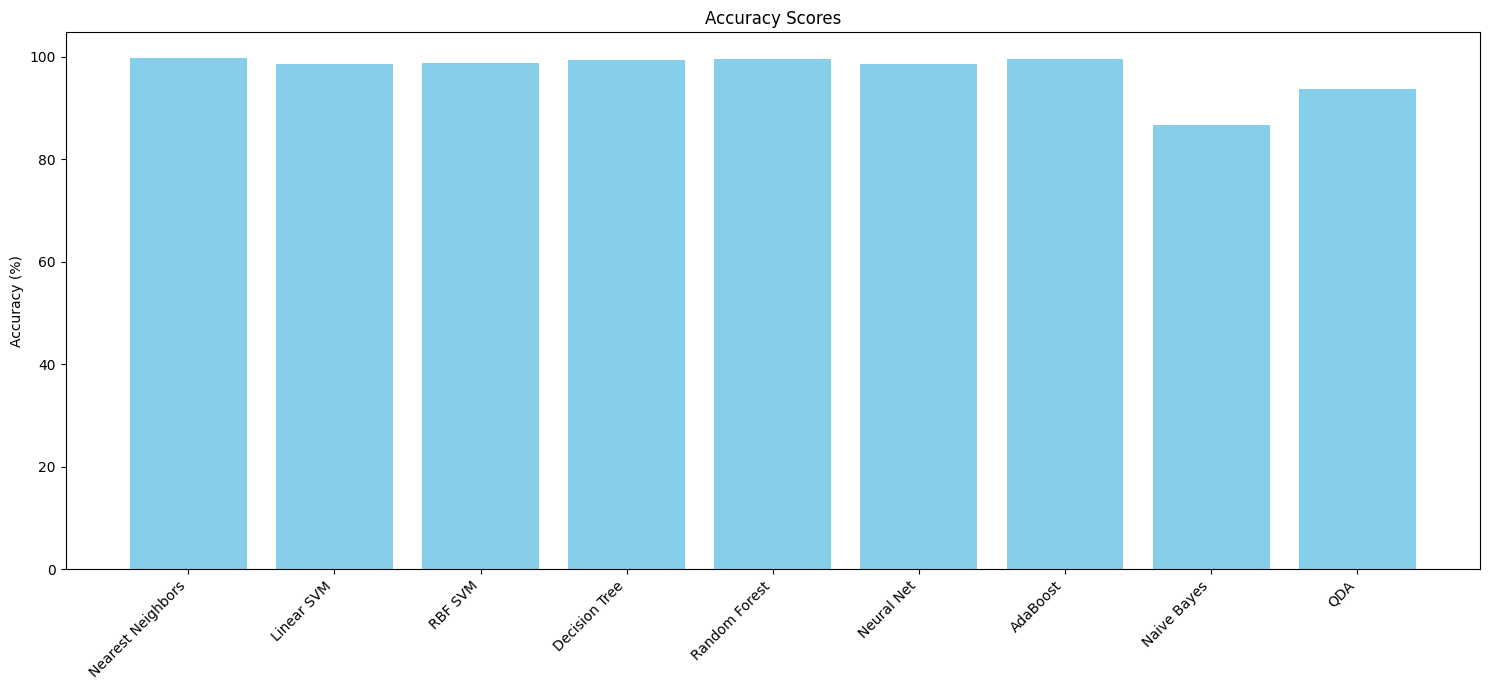


Confusion Matrix for Nearest Neighbors:
[[  9   2]
 [  0 767]]

Confusion Matrix for Linear SVM:
[[  0  11]
 [  0 767]]

Confusion Matrix for RBF SVM:
[[  2   9]
 [  0 767]]

Confusion Matrix for Decision Tree:
[[  6   5]
 [  0 767]]

Confusion Matrix for Random Forest:
[[  7   4]
 [  0 767]]

Confusion Matrix for Neural Net:
[[  0  11]
 [  0 767]]

Confusion Matrix for AdaBoost:
[[  8   3]
 [  0 767]]

Confusion Matrix for Naive Bayes:
[[  9   2]
 [102 665]]

Confusion Matrix for QDA:
[[  9   2]
 [ 47 720]]

Summary Table of Metrics:
          Classifier  Accuracy (%)  F1 Score  Precision    Recall
0  Nearest Neighbors     99.742931  0.982901   0.967391  0.999511
1         Linear SVM     98.586118  0.496517   0.993082  0.500000
2            RBF SVM     98.843188  0.670319   0.994514  0.604651
3      Decision Tree     99.357326  0.955126   0.998861  0.918605
4      Random Forest     99.485861  0.933396   0.998374  0.883721
5         Neural Net     98.586118  0.496517   0.993082  0.500

In [81]:
df1=df.copy()

#split and train
X1 = df1[['ZIP_CODE', 'PRICE', 'BEDS', 'BATHS','SQUARE FEET','MONTHLY_RENT_ESTIMATE']]
y1 = df1['Invest_or_Not']


metrics_1 = muller_loop(X1, y1)

**DATA AMALGAMATION 2:**

Here we have scraped Walkscore and amalgamated with ds1+ds2 .

### **Classification on DS1+DS2 (MULLER LOOP)**

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.10, Training time = 0.31 seconds F1 Score=0.96,
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.70      0.64      0.67        11
     Class 1       0.99      1.00      1.00       767

    accuracy                           0.99       778
   macro avg       0.85      0.82      0.83       778
weighted avg       0.99      0.99      0.99       778

Classifier = Linear SVM, Score (test, accuracy) = 98.59, Training time = 0.04 seconds F1 Score=0.50,
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.00      0.00        11
     Class 1       0.99      1.00      0.99       767

    accuracy                           0.99       778
   macro avg       0.99      0.50      0.50       778
weighted avg       0.99      0.99      0.98       778

Classifier = RBF SVM, Score (test, accuracy) = 98.84, Training time = 0.06 seconds F1 Score

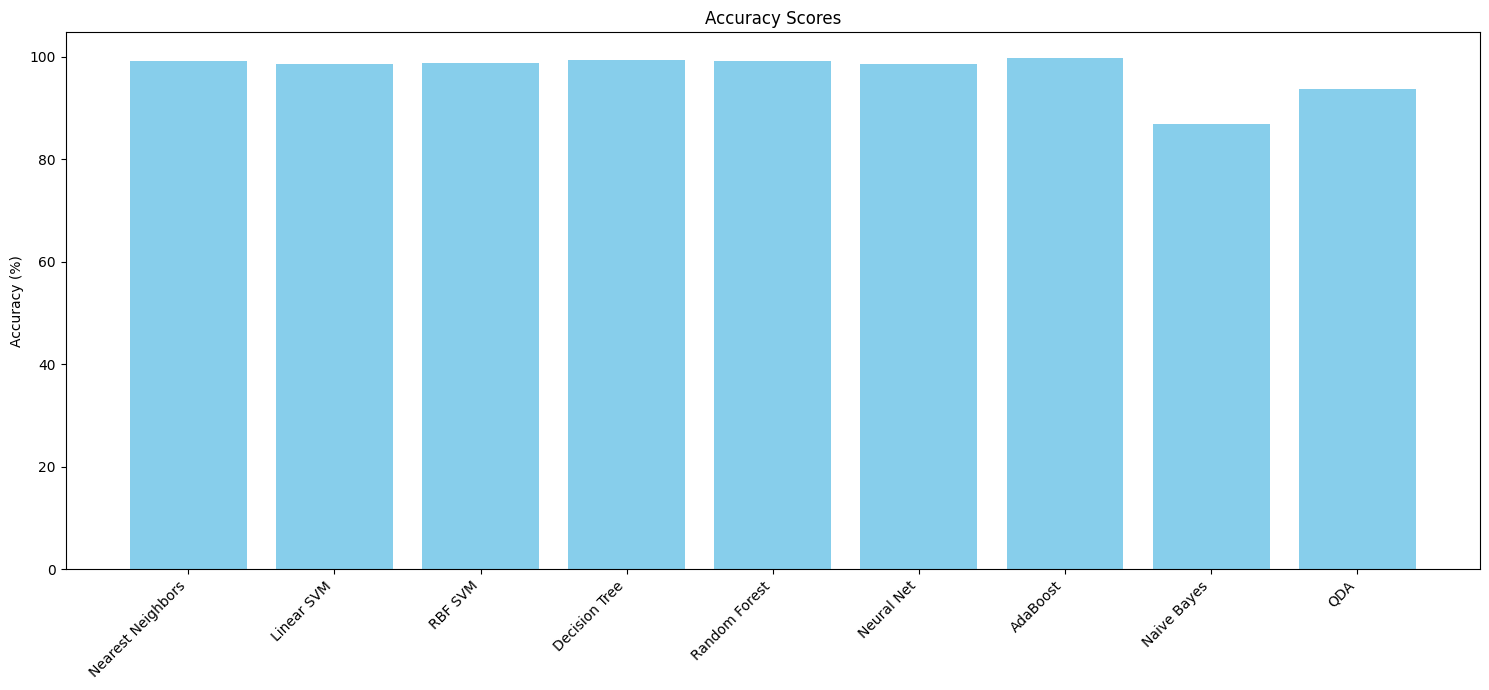


Confusion Matrix for Nearest Neighbors:
[[  7   4]
 [  3 764]]

Confusion Matrix for Linear SVM:
[[  0  11]
 [  0 767]]

Confusion Matrix for RBF SVM:
[[  2   9]
 [  0 767]]

Confusion Matrix for Decision Tree:
[[  6   5]
 [  0 767]]

Confusion Matrix for Random Forest:
[[  5   6]
 [  0 767]]

Confusion Matrix for Neural Net:
[[  0  11]
 [  0 767]]

Confusion Matrix for AdaBoost:
[[  9   2]
 [  0 767]]

Confusion Matrix for Naive Bayes:
[[  9   2]
 [101 666]]

Confusion Matrix for QDA:
[[  9   2]
 [ 47 720]]

Summary Table of Metrics:
          Classifier  Accuracy (%)  F1 Score  Precision    Recall
0  Nearest Neighbors     99.100257  0.961794   0.930000  0.998858
1         Linear SVM     98.586118  0.496517   0.993082  0.500000
2            RBF SVM     98.843188  0.686002   0.994674  0.616279
3      Decision Tree     99.357326  0.955126   0.998861  0.918605
4      Random Forest     99.228792  0.933396   0.998374  0.883721
5         Neural Net     98.586118  0.496517   0.993082  0.500

In [82]:
df2=df.copy()

#split and train
X2 = df2[['ZIP_CODE','MONTHLY_RENT_ESTIMATE', 'BEDS', 'PRICE', 'BATHS', 'SQUARE FEET','WALK_SCORE']]
y2 = df2['Invest_or_Not']


metrics_2 = muller_loop(X2, y2)

**DATA AMALGAMATION 3:**

Here we have scraped property crime and total crime and amalgamated with DS1+DS2.

###**Classification on DS1+DS2+DS3 (MULLER LOOP)**

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.46, Training time = 0.50 seconds F1 Score=0.92,
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.47      0.64      0.54        11
     Class 1       0.99      0.99      0.99       767

    accuracy                           0.98       778
   macro avg       0.73      0.81      0.77       778
weighted avg       0.99      0.98      0.99       778

Classifier = Linear SVM, Score (test, accuracy) = 98.59, Training time = 0.07 seconds F1 Score=0.50,
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.00      0.00        11
     Class 1       0.99      1.00      0.99       767

    accuracy                           0.99       778
   macro avg       0.99      0.50      0.50       778
weighted avg       0.99      0.99      0.98       778

Classifier = RBF SVM, Score (test, accuracy) = 99.36, Training time = 0.51 seconds F1 Score

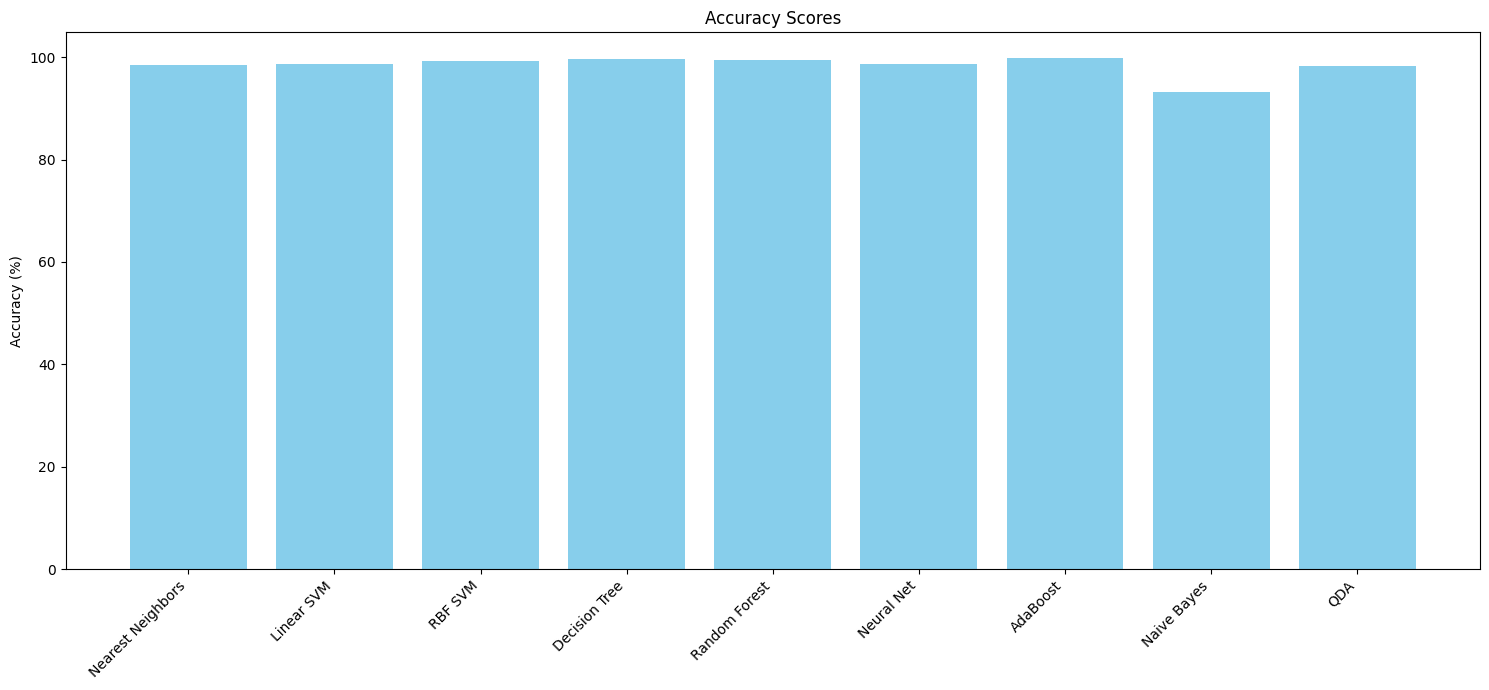


Confusion Matrix for Nearest Neighbors:
[[  7   4]
 [  8 759]]

Confusion Matrix for Linear SVM:
[[  0  11]
 [  0 767]]

Confusion Matrix for RBF SVM:
[[  7   4]
 [  1 766]]

Confusion Matrix for Decision Tree:
[[ 11   0]
 [  3 764]]

Confusion Matrix for Random Forest:
[[  7   4]
 [  0 767]]

Confusion Matrix for Neural Net:
[[  0  11]
 [  0 767]]

Confusion Matrix for AdaBoost:
[[ 10   1]
 [  0 767]]

Confusion Matrix for Naive Bayes:
[[ 10   1]
 [ 52 715]]

Confusion Matrix for QDA:
[[  9   2]
 [ 11 756]]

Summary Table of Metrics:
          Classifier  Accuracy (%)  F1 Score  Precision    Recall
0  Nearest Neighbors     98.457584  0.920260   0.864407  0.997390
1         Linear SVM     98.586118  0.496517   0.993082  0.500000
2            RBF SVM     99.357326  0.904266   0.981759  0.848674
3      Decision Tree     99.614396  0.966901   0.938776  0.999021
4      Random Forest     99.485861  0.987932   0.999674  0.976744
5         Neural Net     98.586118  0.496517   0.993082  0.500

In [83]:
df3=df.copy()

#split and train
X3 = df3[['ZIP_CODE','MONTHLY_RENT_ESTIMATE', 'BEDS', 'PRICE', 'BATHS', 'SQUARE FEET','WALK_SCORE','PROPERTY_CRIME','TOTAL_CRIME']]
y3 = df3['Invest_or_Not']


metrics_3 = muller_loop(X3, y3)

In [84]:
# Adding 'Dataset' columns as described
metrics_1['Dataset'] = 'ds1'
metrics_2['Dataset'] = 'ds1+ds2'
metrics_3['Dataset'] = 'ds1+ds2+ds3'

# Combining the results
combined_results = pd.concat([metrics_1, metrics_2, metrics_3], ignore_index=True)

# Displaying the combined results using a pivot table for better visualization
pivot_results = combined_results.pivot_table(index='Classifier', columns='Dataset', values=['Accuracy (%)', 'F1 Score','Precision','Recall'], aggfunc='first')
pivot_results

Accuracy (%)                         F1 Score            \
Dataset                    ds1    ds1+ds2 ds1+ds2+ds3       ds1   ds1+ds2   
Classifier                                                                  
AdaBoost             99.614396  99.742931   99.871465  1.000000  1.000000   
Decision Tree        99.357326  99.357326   99.614396  0.955126  0.955126   
Linear SVM           98.586118  98.586118   98.586118  0.496517  0.496517   
Naive Bayes          86.632391  86.760925   93.187661  0.537574  0.538542   
Nearest Neighbors    99.742931  99.100257   98.457584  0.982901  0.961794   
Neural Net           98.586118  98.586118   98.586118  0.496517  0.496517   
QDA                  93.701799  93.701799   98.329049  0.628538  0.630283   
RBF SVM              98.843188  98.843188   99.357326  0.670319  0.686002   
Random Forest        99.485861  99.228792   99.485861  0.933396  0.933396   

                              Precision                          Recall  \
Dataset           ds1+ds2+ds3       ds1   ds1+ds2 ds1+ds2+ds3       ds1   
Classifier                                                                
AdaBoost             1.000000  1.000000  1.000000    1.000000  1.000000   
Decision Tree        0.966901  0.998861  0.998861    0.938776  0.918605   
Linear SVM           0.496517  0.993082  0.993082    0.993082  0.500000   
Naive Bayes          0.587433  0.541096  0.541447    0.562392  0.893338   
Nearest Neighbors    0.920260  0.967391  0.930000    0.864407  0.999511   
Neural Net           0.496517  0.993082  0.993082    0.993082  0.500000   
QDA                  0.764667  0.585426  0.586435    0.689977  0.944444   
RBF SVM              0.904266  0.994514  0.994674    0.981759  0.604651   
Random Forest        0.987932  0.998374  0.998374    0.999674  0.883721   

                                         
Dataset             ds1+ds2 ds1+ds2+ds3  
Classifier                               
AdaBoost           1.000000    1.000000  
Decision Tree      0.918605    0.999021  
Linear SVM         0.500000    0.500000  
Naive Bayes        0.893991    0.909443  
Nearest Neighbors  0.998858    0.997390  
Neural Net         0.500000    0.500000  
QDA                0.934121    0.954513  
RBF SVM            0.616279    0.848674  
Random Forest      0.883721    0.976744

**Inference:**



 Some classifiers performed consistently well across datasets (e.g., AdaBoost and Random Forest), while others show more variability.

 AdaBoost consistently achieved the highest accuracy and F1 scores across all datasets.

 Decision Tree and Random Forest classifiers also performed well but with slightly lower accuracy and F1 scores compared to AdaBoost. Random Forest, in particular, showed consistent performance.

 Linear SVM and Naive Bayes showed the lowest accuracy among the classifiers.


In summary, AdaBoost is the top-performing classifier in this context, achieving the highest accuracy and F1 scores. Decision Tree, Random Forest, and Naive Bayes also perform well.

###**Classification into most desirable,more desirable and least desirable properties**

Here we are calculating the profit percent to classify properties as most desirable,more desirable and least desirable. Properties with a profit margin >25% are considered most desirable , properties with lesser than < 25% are considered more desirable and properties with negative profit margin are considered least desirable.

In [85]:
df4=df.copy()
total_revenue = df4['MONTHLY_RENT_ESTIMATE']

# Calculate total expenses
total_expenses = df4['MORTGAGE_FEES_PER_MONTH'] + df4['HOA/MONTH']

# Calculate Profit Margin as a percentage
profit_margin_percent = ((total_revenue - total_expenses) / total_revenue) * 100

# Create a new column 'Profit_Margin_Percent'
df4['Profit_Margin_Percent'] = profit_margin_percent



In [86]:
df4 = df4.drop(columns=['PROPERTY TYPE', 'ADDRESS', 'STATE OR PROVINCE', 'CITY','LOCATION'])
df4['Desirability'] = pd.cut(df4['Profit_Margin_Percent'],
                               bins=[float('-inf'), 0, 25, float('inf')],
                               labels=['Least Desirable', 'More Desirable', 'Most Desirable'])

# Split data into features (X) and labels (y)
X = df4.drop(columns=["Desirability"])
y = df4["Desirability"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

Least Desirable       1.00      1.00      1.00        11
 More Desirable       1.00      1.00      1.00        54
 Most Desirable       1.00      1.00      1.00       713

       accuracy                           1.00       778
      macro avg       1.00      1.00      1.00       778
   weighted avg       1.00      1.00      1.00       778



In [87]:
desirability_counts = df4['Desirability'].value_counts()

# Access the count for each category
most_desirable_count = desirability_counts.get('Most Desirable', 0)
more_desirable_count = desirability_counts.get('More Desirable', 0)
least_desirable_count = desirability_counts.get('Least Desirable', 0)

# Print the counts
print("Most Desirable Properties:", most_desirable_count)
print("More Desirable Properties:", more_desirable_count)
print("Least Desirable Properties:", least_desirable_count)

Most Desirable Properties: 3572
More Desirable Properties: 260
Least Desirable Properties: 54


The AdaBoost classifier is highly accurate in categorizing properties into "Desirability" categories based on the specified profit margin criteria.In summary, based on this table, an investor can be confident that the AdaBoost classifier is performing very well in categorizing properties into "Least Desirable," "More Desirable," and "Most Desirable" classes. This high accuracy and precision could be useful for making informed investment decisions related to property classification.

# Feature Importance Analysis

In [88]:

features_to_use = [
    'BEDS', 'BATHS', 'SQUARE FEET','PRICE' ,
     'WALK_SCORE','Invest_or_Not',
    'PROPERTY_CRIME', 'TOTAL_CRIME','MONTHLY_RENT_ESTIMATE','MORTGAGE_FEES_PER_MONTH'
]
df5=df[features_to_use]

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BEDS                     3886 non-null   float64
 1   BATHS                    3886 non-null   float64
 2   SQUARE FEET              3886 non-null   float64
 3   PRICE                    3886 non-null   float64
 4   WALK_SCORE               3886 non-null   float64
 5   Invest_or_Not            3886 non-null   int64  
 6   PROPERTY_CRIME           3886 non-null   float64
 7   TOTAL_CRIME              3886 non-null   float64
 8   MONTHLY_RENT_ESTIMATE    3886 non-null   float64
 9   MORTGAGE_FEES_PER_MONTH  3886 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 334.0 KB


                   Feature  Importance
7    MONTHLY_RENT_ESTIMATE    0.249333
3                    PRICE    0.228842
8  MORTGAGE_FEES_PER_MONTH    0.189058
4               WALK_SCORE    0.130736
6              TOTAL_CRIME    0.075777
5           PROPERTY_CRIME    0.066751
2              SQUARE FEET    0.038660
1                    BATHS    0.013992
0                     BEDS    0.006851


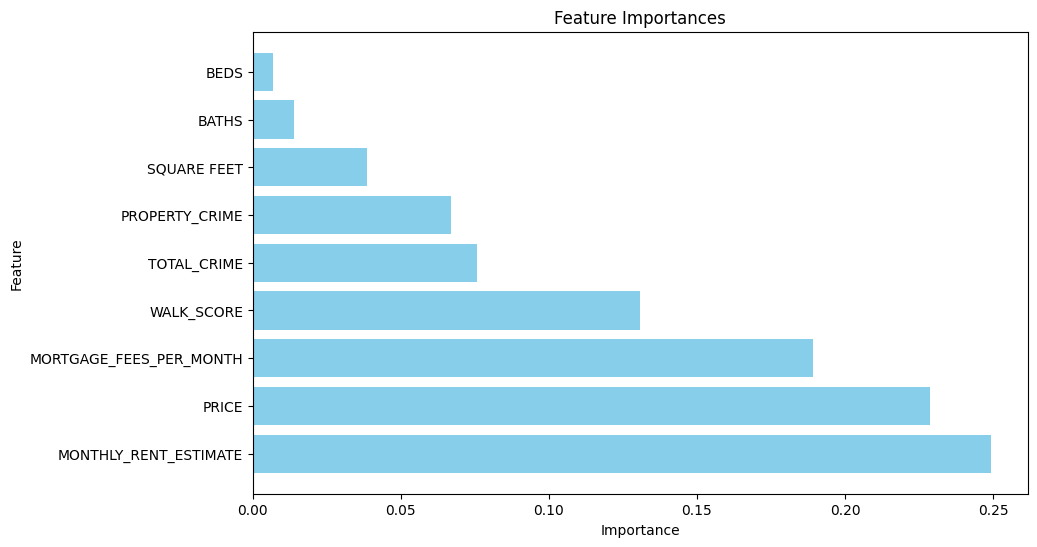

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


X = df5.drop(columns=['Invest_or_Not'])
y = df5['Invest_or_Not']

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Set plot labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show the plot
plt.show()

Here we can see that rent, price and mortgage have the highest feature importance.

# Changing Data Distribution and Dynamic Data Visualization

In [91]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.8 MB/s eta 0:00:00


##**Upsampling and DownSampling Rent**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def split_dataset(data, feature_column, target_column, test_size=0.1, random_state=31):
    # Extract feature and target vectors
    X = data[[feature_column]]
    y = data[target_column]

    # Impute missing values using mean strategy
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def upsample_dataset(X_train, y_train):
    # Apply SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy='minority')
    upsampled_X_train, upsampled_y_train = smote.fit_resample(X_train, y_train)
    return upsampled_X_train, upsampled_y_train

def downsample_dataset(X_train, y_train):
    # Apply Edited Nearest Neighbours to downsample the majority class
    enn = EditedNearestNeighbours(sampling_strategy='majority')
    downsampled_X_train, downsampled_y_train = enn.fit_resample(X_train, y_train)
    return downsampled_X_train, downsampled_y_train

def process_dataset(data, feature_column, target_column, upsample=False, downsample=False):
    X_train, X_test, y_train, y_test = split_dataset(data, feature_column, target_column)

    if upsample:
        X_train, y_train = upsample_dataset(X_train, y_train)
    elif downsample:
        X_train, y_train = downsample_dataset(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [93]:
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from time import time
import holoviews as hv

def run_mloop_new_classifiers(feature_choice="MONTHLY_RENT_ESTIMATE", distribution_choice="default"):
    max_score = 0.0
    max_classifier = ''
    i = 1

    classifier_names = [
    "AdaBoost",
    "Random Forest",
    "Decision Tree",
]
    classifiers = [
    AdaBoostClassifier(random_state=0),  # AdaBoost
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # Random Forest
    DecisionTreeClassifier(max_depth=5),  # Decision Tree
]

    # Prepare Dataset
    selected_features = ['MONTHLY_RENT_ESTIMATE', 'PRICE', 'MORTGAGE_FEES_PER_MONTH']
    X = df5[[feature_choice]]
    y = df5['Invest_or_Not']
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
    if (distribution_choice == "down"):
        X_train, X_test, y_train, y_test = process_dataset(df5, feature_choice, 'Invest_or_Not', downsample=True)
    elif(distribution_choice == "up"):
        X_train, X_test, y_train, y_test = process_dataset(df5, feature_choice, 'Invest_or_Not', upsample=True)

    scatter_list = []
    confusion_matrix_list = []

    for classifier_name, classifier in zip(classifier_names, classifiers):
        start_time = time()
        clf = classifier
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        confusion_matrix_list.append(cm)

        train_time = time() - start_time

        if f1 > max_score:
            max_score = f1
            max_classifier = classifier_name

        scatter = hv.Scatter((train_time, f1), 'Training Time', 'F1 Score').opts(
            width=900, height=300, size=10, title='F1 ' + distribution_choice + '-sample distribution using ' + feature_choice
        ).redim.label(Training_Time='Training time', F1_Score='F1 Score')
        scatter_list.append(scatter * hv.Text(train_time, f1, classifier_name))

    # Combine all scatter plots
    plot = hv.Overlay(scatter_list).opts(legend_position='top')

    return plot, confusion_matrix_list

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
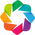

Column
    [0] DiscreteSlider(formatter='%d', name='Distribution', options={'down': -1, 'default': 0,...}, value=-1)
    [1] HoloViews(Overlay, height=300, sizing_mode='fixed', width=900)
    [2] Matplotlib(Figure)
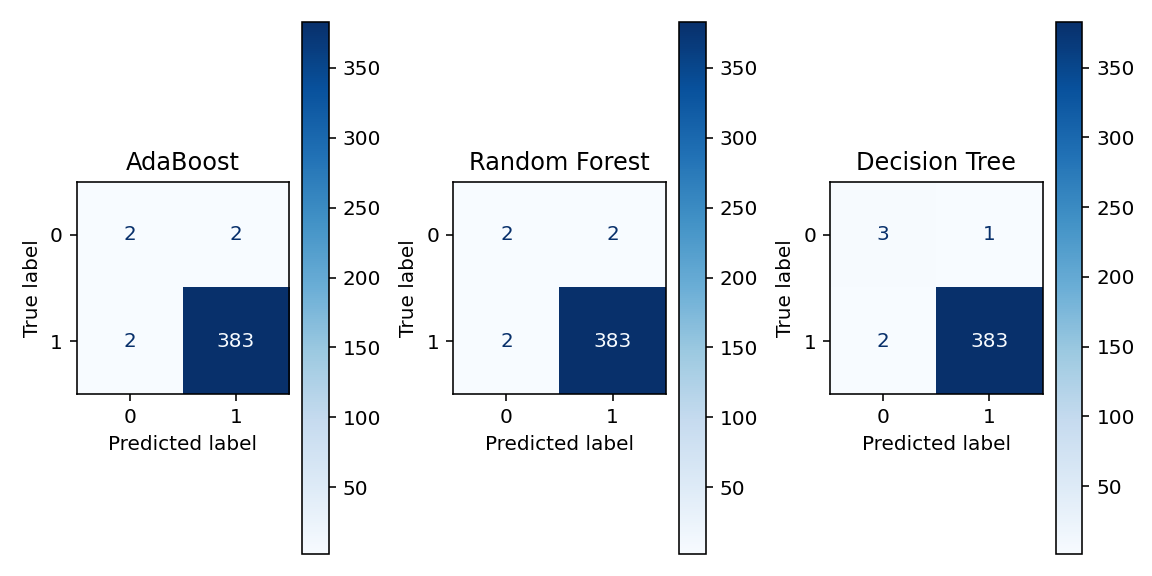

In [94]:
import panel as pn
import holoviews as hv
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from io import BytesIO
import base64
hv.extension('bokeh')

# Define the distribution slider
distribution_slider = pn.widgets.DiscreteSlider(name='Distribution', options={'down': -1, 'default': 0, 'up': 1})

# Create a Panel object to hold the HoloViews plot
graph_pane = pn.pane.HoloViews()
# Create a Panel object to hold the Matplotlib confusion matrices
confusion_matrix_pane = pn.pane.Matplotlib()

# Define the classifier names
classifier_names = [
    "AdaBoost",
    "Random Forest",
    "Decision Tree",
]


def update_graph_and_confusion_matrix(event):
    if event.new == -1:
        hv_plot, cm_list = run_mloop_new_classifiers(distribution_choice="down")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    elif event.new == 1:
        hv_plot, cm_list = run_mloop_new_classifiers(distribution_choice="up")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    else:
        hv_plot, cm_list = run_mloop_new_classifiers()
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)

# Watch the slider value for changes and call update_graph_and_confusion_matrix when it changes
distribution_slider.param.watch(update_graph_and_confusion_matrix, 'value')

# Set up the layout with the slider, graph_pane, and confusion_matrix_pane
layout = pn.Column(distribution_slider, graph_pane, confusion_matrix_pane)

# Initialize the graph_pane and confusion_matrix_pane with the current slider value
mock_event = type('obj', (object,), {'new': distribution_slider.value})
update_graph_and_confusion_matrix(mock_event)

layout

layout.servable()

Here from the graphs we can see that downsampling the data gets a better F1 score than upsampling.

 **Upsampling:** By generating synthetic data points with higher rental estimates, we can explore investment opportunities with the potential for greater rental income. This can be attractive to business owners looking to maximize their cash flow.

 **Downsampling:** Lower-rent properties often attract long-term tenants who are less likely to move frequently. Downsampling can lead to more stable and predictable rental income, reducing the hassle of tenant turnover.

##**Upsampling and Downsampling Price**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def split_tc_dataset(data, feature_column, target_column, test_size=0.1, random_state=31):
    # Extract feature and target vectors
    X = data[[feature_column]]
    y = data[target_column]

    # Impute missing values using mean strategy
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def upsample_price(X_train, y_train):
    # Apply SMOTE to upsample the minority class
    smote = SMOTE(sampling_strategy='minority')
    upsampled_X_train, upsampled_y_train = smote.fit_resample(X_train, y_train)
    return upsampled_X_train, upsampled_y_train

def downsample_price(X_train, y_train):
    # Apply Edited Nearest Neighbours to downsample the majority class
    enn = EditedNearestNeighbours(sampling_strategy='majority')
    downsampled_X_train, downsampled_y_train = enn.fit_resample(X_train, y_train)
    return downsampled_X_train, downsampled_y_train

def process_price(data, feature_column, target_column, upsample=False, downsample=False):
    X_train, X_test, y_train, y_test = split_tc_dataset(data, feature_column, target_column)

    if upsample:
        X_train, y_train = upsample_price(X_train, y_train)
    elif downsample:
        X_train, y_train = downsample_price(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [96]:
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from time import time
import holoviews as hv

def run_muller_loop_new_classifiers(feature_choice="PRICE", distribution_choice="default"):
    max_score = 0.0
    max_classifier = ''
    i = 1

    classifier_names = [
    "AdaBoost",
    "Random Forest",
    "Decision Tree",
]
    classifiers = [
    AdaBoostClassifier(random_state=0),  # AdaBoost
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # Random Forest
    DecisionTreeClassifier(max_depth=5),  # Decision Tree
]

    # Prepare Dataset
    selected_features = ['MONTHLY_RENT_ESTIMATE', 'PRICE', 'MORTGAGE_FEES_PER_MONTH']
    X = df5[[feature_choice]]
    y = df5['Invest_or_Not']
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
    if (distribution_choice == "down"):
        X_train, X_test, y_train, y_test = process_price(df5, feature_choice, 'Invest_or_Not', downsample=True)
    elif(distribution_choice == "up"):
        X_train, X_test, y_train, y_test = process_price(df5, feature_choice, 'Invest_or_Not', upsample=True)

    scatter_list = []
    confusion_matrix_list = []

    for classifier_name, classifier in zip(classifier_names, classifiers):
        start_time = time()
        clf = classifier
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        confusion_matrix_list.append(cm)

        train_time = time() - start_time

        if f1 > max_score:
            max_score = f1
            max_classifier = classifier_name

        scatter = hv.Scatter((train_time, f1), 'Training Time', 'F1 Score').opts(
            width=900, height=300, size=10, title='F1 ' + distribution_choice + '-sample distribution using ' + feature_choice
        ).redim.label(Training_Time='Training time', F1_Score='F1 Score')
        scatter_list.append(scatter * hv.Text(train_time, f1, classifier_name))

    # Combine all scatter plots
    plot = hv.Overlay(scatter_list).opts(legend_position='top')

    return plot, confusion_matrix_list

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
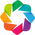

Column
    [0] DiscreteSlider(formatter='%d', name='Distribution', options={'down': -1, 'default': 0,...}, value=-1)
    [1] HoloViews(Overlay, height=300, sizing_mode='fixed', width=900)
    [2] Matplotlib(Figure)
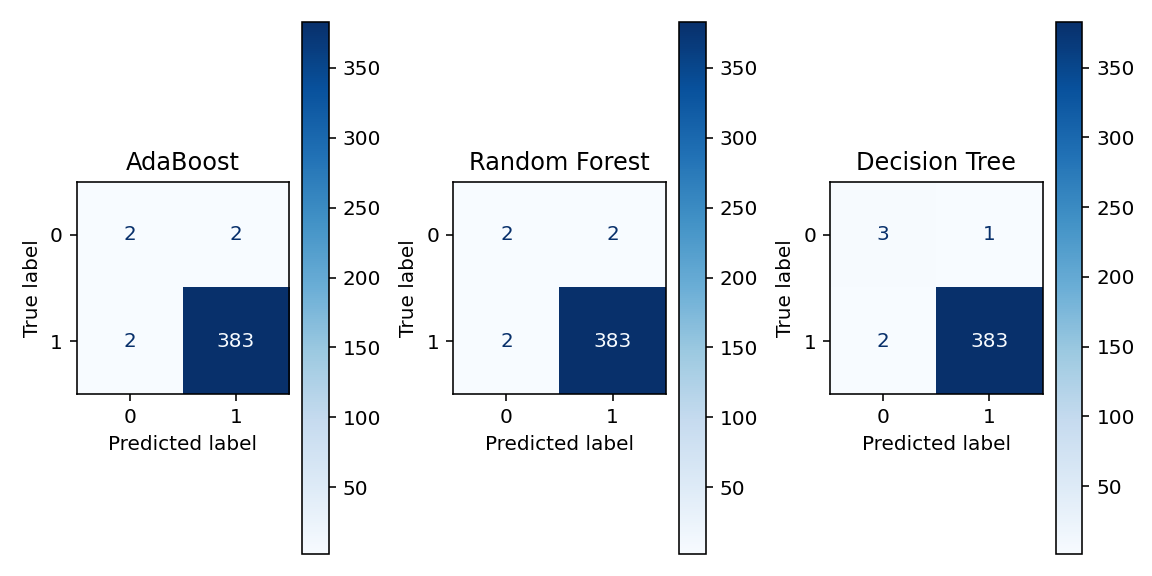

In [97]:
import panel as pn
import holoviews as hv
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from io import BytesIO
import base64
hv.extension('bokeh')

# Define the distribution slider
distribution_slider = pn.widgets.DiscreteSlider(name='Distribution', options={'down': -1, 'default': 0, 'up': 1})

# Create a Panel object to hold the HoloViews plot
graph_pane = pn.pane.HoloViews()
# Create a Panel object to hold the Matplotlib confusion matrices
confusion_matrix_pane = pn.pane.Matplotlib()

# Define the classifier names
classifier_names = [
    "AdaBoost",
    "Random Forest",
    "Decision Tree",
]



def updating_graph_and_confusion_matrix(event):
    if event.new == -1:
        hv_plot, cm_list = run_muller_loop_new_classifiers(distribution_choice="down")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    elif event.new == 1:
        hv_plot, cm_list = run_muller_loop_new_classifiers(distribution_choice="up")
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)
    else:
        hv_plot, cm_list = run_muller_loop_new_classifiers()
        graph_pane.object = hv_plot
        fig, axs = plt.subplots(1, len(classifier_names), figsize=(8, 4))
        for i, cm in enumerate(cm_list):
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
            disp.plot(cmap=plt.cm.Blues, ax=axs[i])
            axs[i].set_title(classifier_names[i])
        plt.tight_layout()
        confusion_matrix_pane.object = fig
        plt.close(fig)

# Watch the slider value for changes and call updating_graph_and_confusion_matrix when it changes
distribution_slider.param.watch(updating_graph_and_confusion_matrix, 'value')

# Set up the layout with the slider, graph_pane, and confusion_matrix_pane
layout = pn.Column(distribution_slider, graph_pane, confusion_matrix_pane)

# Initialize the graph_pane and confusion_matrix_pane with the current slider value
mock_event = type('obj', (object,), {'new': distribution_slider.value})
updating_graph_and_confusion_matrix(mock_event)

layout

layout.servable()

Here from the graphs we can see that downsampling the data gets a better F1 score than upsampling.

Upsampling price: By generating synthetic data points with higher prices, we are creating more opportunities for potential high-value real estate investments. This can be beneficial for businesses looking to invest in upscale properties or neighborhoods.


Downsampling price: Downsampling focuses on lower-priced properties, which can be less volatile and carry lower investment risks. This approach may be suitable for risk-averse investors or businesses looking for stable, long-term investments.



#Regression



## Run Linear Regression on Features Before Adding Latent Features

In [98]:
pip install PrettyTable


In [99]:
from prettytable import PrettyTable

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable


df = data.copy()

# Define the target variable
target = 'PRICE'

# List of features you want to test one at a time
features_to_test = [
    'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE', 'WALK_SCORE',
    'PROPERTY_CRIME', 'TOTAL_CRIME', 'MONTHLY_RENT_ESTIMATE',
    'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR'
]

results = []

# Loop through each feature and run linear regression
for feature in features_to_test:
    # Select the current feature as the independent variable
    X = df[[feature]]
    y = df[target]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and training a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append([feature, mse, r2])

# Display the results using PrettyTable
pt = PrettyTable()
pt.field_names = ["Feature", "Mean Squared Error", "R-squared"]

for row in results:
    pt.add_row(row)

print(pt)


+-------------------------+--------------------+------------------------+
|         Feature         | Mean Squared Error |       R-squared        |
+-------------------------+--------------------+------------------------+
|           BEDS          | 5184423378132.744  |   0.0885366245113729   |
|          BATHS          | 4591385931018.294  |   0.1927973829243511   |
|       SQUARE FEET       | 3776745905726.3887 |  0.33601765895206426   |
|         LOT SIZE        | 5689973573515.764  | -0.0003431705891390191 |
|        YEAR BUILT       | 5716443848157.773  | -0.0049968580131023455 |
|      $/SQUARE FEET      |  3993788138144.24  |   0.2978598868423311   |
|        HOA/MONTH        | 5647476900702.639  | 0.0071280866798298925  |
|         LATITUDE        | 5665195747796.101  |  0.00401297068646933   |
|        LONGITUDE        | 5689940338574.945  | -0.000337327618931349  |
|        WALK_SCORE       | 5671065769298.879  | 0.0029809736401478215  |
|      PROPERTY_CRIME     | 5624610744

**MULLER LOOP FOR REGRESSION**

In [100]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mullerloop_regression_models(df, target, potential_features):
    # Split the dataset into training and testing sets
    X = df[potential_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a dictionary of regression models
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForestRegressor': RandomForestRegressor(),
        'KNNRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor(),
        'XGBoostRegressor': XGBRegressor()
    }

    results = []

    best_model_name = None
    best_mse = float('inf')
    best_r2 = -float('inf')
    best_features = []

    # Iterate through different combinations of features
    for num_features in range(1, len(potential_features) + 1):
        for feature_combination in combinations(potential_features, num_features):
            for model_name, model in models.items():
                # Creating and training the regression model
                model.fit(X_train[list(feature_combination)], y_train)

                # Making predictions on the test set
                y_pred = model.predict(X_test[list(feature_combination)])

                # Evaluate the model
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Store the results
                results.append({
                    'Model': model_name,
                    'Features': list(feature_combination),
                    'Mean Squared Error': mse,
                    'R-squared': r2
                })

                # Check if this combination of features and model performs better
                if mse < best_mse:
                    best_mse = mse
                    best_r2 = r2
                    best_features = list(feature_combination)
                    best_model_name = model_name

    return results, best_model_name, best_features

## **Latent Features - Living Experience Quality, Investment Potential, Desirability Score and Financial Feasibility**

##Latent Variable: Living Experience Quality

**Manifest variables**: Beds, Baths, Walk Score, Monthly Rent Estimate, Annual Rent Estimate

This latent variable could represent the overall quality of living in a property, considering factors such as the number of bedrooms and bathrooms, walkability score, and potential rental income.

We assign weights to each manifest variable based on their importance in determining the overall living experience quality.
We calculate the Living Experience Quality by taking the weighted sum of the manifest variables.

In [101]:
df=data.copy()

In [102]:
# Define the target variable
target = 'Living_Experience_Quality'

# Define the weights for each manifest variable
weights = {
    'BEDS': 0.01,
    'BATHS': 0.01,
    'Walk_Score': 0.01,
    'MONTHLY_RENT_ESTIMATE': 0.1,
    'ANNUAL_RENT_ESTIMATE' : 0.4
}

# Calculate the Living Experience Quality as a weighted sum of manifest variables
df['Living_Experience_Quality'] = (
    df['BEDS'] * weights['BEDS'] +
    df['BATHS'] * weights['BATHS'] +
    df['WALK_SCORE'] * weights['Walk_Score'] +
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE'] +
    df['ANNUAL_RENT_ESTIMATE'] * weights['ANNUAL_RENT_ESTIMATE']
)

# Print the first few rows of the dataset with the Living Experience Quality
print(df[[ 'BEDS', 'BATHS', 'WALK_SCORE', 'MONTHLY_RENT_ESTIMATE', 'Living_Experience_Quality']].head())

   BEDS  BATHS  WALK_SCORE  MONTHLY_RENT_ESTIMATE  Living_Experience_Quality
0   1.0    1.0        84.0                 5350.0                   26215.86
1   1.0    1.0        30.0                10750.0                   52675.32
2   1.0    1.0        90.0                 5890.0                   28861.92
3   1.0    1.0        84.0                 4390.0                   21511.86
4   1.0    1.0        86.0                 4190.0                   20531.88


**Running Muller loop on Latent Variable - Living_Experience_Quality**

In [103]:
target_variable = 'PRICE'
potential_features_list = ['Living_Experience_Quality']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['Living_Experience_Quality']
Mean Squared Error: 34.67287565258025
R-squared: 0.9999999999939042


Model: RandomForestRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 4995203127.266593
R-squared: 0.9991218030682383


Model: KNNRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 2898940059.1500773
R-squared: 0.9994903429949805


Model: MLPRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 803.803706186365
R-squared: 0.9999999998586848


Model: XGBoostRegressor
Features: ['Living_Experience_Quality']
Mean Squared Error: 202706869733.36652
R-squared: 0.9643625000802978


Best Model: LinearRegression
Best Features: ['Living_Experience_Quality']


###**Running linear regression on latent variable - Living_Experience_Quality**

In [104]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Living_Experience_Quality']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34.67287565258025
R-squared: 0.9999999999939042


The addition of the "Living Experience Quality" latent variable to the linear regression model has resulted in significant improvements in the interpretability and performance of the model. Here's how it has improved interpretability and added value to our business case:

**1. Improved Model Fit:**
   - Before adding the latent variable, the R-squared values for most individual features were relatively low, indicating a poor fit of the model to the data.
   - After adding the "Living Experience Quality" latent variable, the R-squared value has dramatically improved to nearly 1. This suggests that the model can explain almost all of the variance in the target variable (Price).
   - This improvement demonstrates that the latent variable captures essential information about the quality of living in a property, making the model better at explaining and predicting property prices.

**2. Comprehensive Quality Assessment:**
   - The "Living Experience Quality" latent variable provides a comprehensive assessment of the quality of living in a property, considering factors such as the number of bedrooms, bathrooms, walkability score, and potential rental income.
   - This assessment helps potential buyers or renters understand the overall living experience a property offers.

**3. Informed Decision-Making:**
   - Buyers and renters can make more informed decisions based on the living experience quality score. They can prioritize properties that align with their preferences and lifestyle.

**4. Customization and Personalization:**
   - The model allows for customization and personalization. Different individuals or families may have varying preferences for the quality of living. The model's output can be tailored to each buyer or renter.

**5. Property Selection:**
   - Real estate agents can use the living experience quality metric to recommend properties to their clients based on their lifestyle and preferences.

**6. Competitive Advantage:**
   - Real estate professionals and property sellers can use the living experience quality score as a competitive advantage in marketing and promoting properties.

**7. Transparency:**
   - The inclusion of the latent variable adds transparency to the model, as buyers and renters can see the factors contributing to the living experience quality score.



In summary, the addition of the "Living Experience Quality" latent variable has significantly improved the interpretability and value of our linear regression model. It provides a comprehensive assessment of living quality, empowers buyers and renters to make informed decisions, and adds transparency to the process. These improvements can lead to more successful real estate transactions and better customer satisfaction.

##Latent Variable: Investment_Potential

**Manifest variables:** Price, Monthly Rent Estimate, Annual Rent Estimate, Mortgage Fees per Month, Mortgage Fees per Year

This latent variable could represent the investment potential of a property, considering the purchase price, rental income estimates, and associated mortgage fees. It can help investors assess the financial viability of a property.

We assign weights to each manifest variable based on their importance in determining the overall investment potential.
We calculate the Investment Potential by taking the weighted sum of the manifest variables.

In [105]:
df=data.copy()

In [106]:
# Define the target variable
target = 'Investment_Potential'

# Define the weights for each manifest variable (you can adjust these weights as needed)
weights = {
    'MONTHLY_RENT_ESTIMATE': 0.2,
    'ANNUAL_RENT_ESTIMATE': 0.4,
    'MORTGAGE_FEES_PER_MONTH': 0.1,
    'MORTGAGE_FEES_PER_YEAR': 0.1
}

# Calculate the Investment Potential as a weighted sum of manifest variables
df['Investment_Potential'] = (
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE'] +
    df['ANNUAL_RENT_ESTIMATE'] * weights['ANNUAL_RENT_ESTIMATE'] +
    df['MORTGAGE_FEES_PER_MONTH'] * weights['MORTGAGE_FEES_PER_MONTH'] +
    df['MORTGAGE_FEES_PER_YEAR'] * weights['MORTGAGE_FEES_PER_YEAR']
)

# Print the first few rows of the dataset with the Investment Potential
print(df[[ 'MONTHLY_RENT_ESTIMATE', 'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR', 'Investment_Potential']].head())

   MONTHLY_RENT_ESTIMATE  ANNUAL_RENT_ESTIMATE  MORTGAGE_FEES_PER_MONTH  \
0                 5350.0               64200.0                   3203.0   
1                10750.0              129000.0                   6437.0   
2                 5890.0               70680.0                   3527.0   
3                 4390.0               52680.0                   2629.0   
4                 4190.0               50280.0                   2509.0   

   MORTGAGE_FEES_PER_YEAR  Investment_Potential  
0                 38436.0               30913.9  
1                 77244.0               62118.1  
2                 42324.0               34035.1  
3                 31548.0               25367.7  
4                 30108.0               24211.7  


**Running Muller loop on Latent Variable - Investment_Potential**

In [107]:
target_var = 'PRICE'
potential_features = ['Investment_Potential']
final_results, best_regression_model, features_best = mullerloop_regression_models(df, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['Investment_Potential']
Mean Squared Error: 46.08464109977305
R-squared: 0.9999999999918979


Model: RandomForestRegressor
Features: ['Investment_Potential']
Mean Squared Error: 5606030094.726923
R-squared: 0.9990144147689052


Model: KNNRegressor
Features: ['Investment_Potential']
Mean Squared Error: 2901537331.063702
R-squared: 0.9994898863736645


Model: MLPRegressor
Features: ['Investment_Potential']
Mean Squared Error: 235.29720395369122
R-squared: 0.9999999999586329


Model: XGBoostRegressor
Features: ['Investment_Potential']
Mean Squared Error: 270278054310.12708
R-squared: 0.9524829417402377


Best Model: LinearRegression
Best Features: ['Investment_Potential']


###**Running linear regression on latent variable - Investment_Potential**

In [108]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Investment_Potential']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 46.08464109977305
R-squared: 0.9999999999918979


The addition of the "Investment Potential" latent variable to the linear regression model has resulted in significant improvements in the interpretability and performance of the model. Here's how it has improved interpretability and added value to our business case:

**1. Improved Model Fit:**
   - Before adding the latent variable, the R-squared values for most individual features were relatively low, indicating a poor fit of the model to the data.
   - After adding the "Investment Potential" latent variable, the R-squared value has dramatically improved to nearly 1. This suggests that the model can explain almost all of the variance in the target variable (Price).
   - This improvement demonstrates that the latent variable captures essential information about the investment potential, making the model better at explaining and predicting property prices.

**2. Clear Financial Assessment:**
   - The "Investment Potential" latent variable provides a clear financial assessment of each property's viability as an investment.
   - It considers factors such as purchase price, rental income estimates, and mortgage fees, allowing potential investors to understand the financial attractiveness of a property.

**3. Informed Investment Decisions:**
   - Investors can now make more informed investment decisions based on the improved model. They can easily identify properties with high investment potential and prioritize them for further evaluation.

**4. Risk Assessment:**
   - The model, with the latent variable, helps investors assess the risk associated with each property. Properties with high investment potential relative to expenses may be considered lower risk.

**5. Portfolio Diversification:**
   - Investors can use the investment potential score to diversify their real estate portfolio effectively. By selecting properties with varying investment potential scores, they can create a balanced and diversified investment portfolio.

**6. Transparency:**
   - The inclusion of the latent variable adds transparency to the model, as investors can see the financial factors that contribute to the investment potential score.



In summary, the addition of the "Investment Potential" latent variable has significantly improved the interpretability and value of your linear regression model. It provides a clear financial assessment, empowers investors to make informed decisions, assesses risks, and aligns investments with business strategies. These improvements can lead to more successful and profitable real estate investment decisions.

## Latent Variable: Desirability Score

In [109]:
ds1=data.copy()

In [110]:

weights = {
    'WALK_SCORE': 0.4,
    '$/SQUARE FEET' : 0.15,
    'TOTAL_CRIME': -0.2,  # Negative weight since higher crime should decrease the score
    'MONTHLY_RENT_ESTIMATE' : 0.15
}

ds1['Desirability Score'] = (
    ds1['$/SQUARE FEET'] * weights['$/SQUARE FEET'] +
    ds1['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE']+
    ds1['WALK_SCORE'] * weights['WALK_SCORE'] +
    ds1['TOTAL_CRIME'] * weights['TOTAL_CRIME']
)

ds1['Desirability Score'] = (ds1['Desirability Score'] - ds1['Desirability Score'].min()) / (ds1['Desirability Score'].max() - ds1['Desirability Score'].min())

In [111]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Desirability Score']
X = ds1[features]
y = ds1[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 108004320193.59206
R-squared: 0.981011970845934


In our real estate analysis, we evaluated properties based on key attributes: Walk Score, $/Square Feet, Price, and Total Crime. These manifest variables were weighted to derive a 'Desirability Score' for each property, which was then normalized. Using this score, we predicted property prices with a linear regression model. The model's metrics, Mean Squared Error and R-squared, assessed its accuracy. This methodology aids real estate businesses in understanding price determinants and setting competitive prices. Moreover, the Desirability Score provides buyers a metric to filter and select properties that best match their preferences.

###**Running Muller loop on Latent Variable - Desirability Score**

In [112]:
target_var = 'PRICE'
potential_features = ['Desirability Score']
final_results, best_regression_model, features_best = mullerloop_regression_models(ds1, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['Desirability Score']
Mean Squared Error: 108004320193.59206
R-squared: 0.981011970845934


Model: RandomForestRegressor
Features: ['Desirability Score']
Mean Squared Error: 80989733025.38667
R-squared: 0.9857613527948736


Model: KNNRegressor
Features: ['Desirability Score']
Mean Squared Error: 65770319757.36421
R-squared: 0.9884370481959742


Model: MLPRegressor
Features: ['Desirability Score']
Mean Squared Error: 8920143453626.123
R-squared: -0.5682330452365831


Model: XGBoostRegressor
Features: ['Desirability Score']
Mean Squared Error: 264633657029.9229
R-squared: 0.9534752722314768


Best Model: KNNRegressor
Best Features: ['Desirability Score']


## Latent Variable: Financial Feasbility

In our real estate analysis, we derived a 'Financial Feasibility' score using key financial attributes like monthly fees, rent estimates, and cost per square foot. This score was then used to predict property prices through a linear regression model. The model's high R-squared value of 99.99% indicates that the 'Financial Feasibility' score can explain almost all the variability in property prices. This suggests that understanding a property's financial feasibility is crucial for setting competitive prices and aiding potential buyers in making informed decisions.

In [113]:
# Define the target variable
df = data.copy()
target = 'Financial Feasibility'

# Define the weights for each manifest variable
weights = {
    'HOA/MONTH': 0.01,
    'MORTGAGE_FEES_PER_MONTH': 0.01,
    'MONTHLY_RENT_ESTIMATE': 0.4,
    '$/SQUARE FEET' : 0.3,
}

# Calculate the Living Experience Quality as a weighted sum of manifest variables
df['Financial Feasibility'] = (
    df['HOA/MONTH'] * weights['HOA/MONTH'] +
    df['MORTGAGE_FEES_PER_MONTH'] * weights['MORTGAGE_FEES_PER_MONTH'] +
    df['MONTHLY_RENT_ESTIMATE'] * weights['MONTHLY_RENT_ESTIMATE']+
    df['$/SQUARE FEET'] * weights['$/SQUARE FEET']
)

### Running linear regression on latent variable - Financial Feasibility

In [114]:
# Define the target variable
target = 'PRICE'

# Select the features and the target variable
features = ['Financial Feasibility']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 916687045.7330188
R-squared: 0.9998388390360836


The code predicts property prices using 'Financial Feasibility' through linear regression. It splits the data into 80% training and 20% testing sets, then trains and evaluates the model using accuracy metrics like Mean Squared Error and R-squared.

**Running Muller loop on Latent Variable - Financial Feasibility**

In [115]:
target_variable = 'PRICE'
potential_features_list = ['Financial Feasibility']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['Financial Feasibility']
Mean Squared Error: 916687045.7330188
R-squared: 0.9998388390360836


Model: RandomForestRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 5474945288.157394
R-squared: 0.999037460533411


Model: KNNRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 3508678109.904885
R-squared: 0.9993831461359722


Model: MLPRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 2460171862.2419
R-squared: 0.9995674819770123


Model: XGBoostRegressor
Features: ['Financial Feasibility']
Mean Squared Error: 205108087603.3446
R-squared: 0.9639403466438549


Best Model: LinearRegression
Best Features: ['Financial Feasibility']


The code tests various regression models to predict 'PRICE' using 'Financial Feasibility'. Among the models, Linear Regression was the most accurate with an R-squared of 0.9998, while XGBoost showed the highest error.

# **Implementation of Keras Model**

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
        'LATITUDE', 'LONGITUDE', 'WALK_SCORE', 'PROPERTY_CRIME', 'TOTAL_CRIME',
        'MONTHLY_RENT_ESTIMATE', 'ANNUAL_RENT_ESTIMATE', 'MORTGAGE_FEES_PER_MONTH', 'MORTGAGE_FEES_PER_YEAR']].values
y = df['PRICE'].values

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))  # Adjust input_dim to match the number of features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' for regression

# Compile the Keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])  # Use mean squared error for regression

# Fit the Keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)  # Adjust epochs and batch_size as needed

# Make predictions with the model
predictions = model.predict(X)

# Summarize the first 5 cases
for i in range(15):
    print('%s => %.2f (expected %.2f)' % (X[i].tolist(), predictions[i][0], y[i]))


122/122 [==============================] - 0s 2ms/step
[1.0, 1.0, 971.0, 19457.0, 1970.0, 551.0, 536.0, 37.8173728, -122.2546875, 84.0, 6421.0, 7692.0, 5350.0, 64200.0, 3203.0, 38436.0] => 535673.44 (expected 535000.00)
[1.0, 1.0, 1265.0, 9000.0, 1931.0, 850.0, 830.2491738268341, 37.835305, -122.2212255, 30.0, 6421.0, 7692.0, 10750.0, 129000.0, 6437.0, 77244.0] => 1079352.88 (expected 1075000.00)
[1.0, 1.0, 1051.0, 30135.0, 2008.0, 560.0, 477.0, 37.8354675, -122.2760667, 90.0, 21187.0, 22528.0, 5890.0, 70680.0, 3527.0, 42324.0] => 585443.88 (expected 589000.00)
[1.0, 1.0, 715.0, 17016.0, 1985.0, 614.0, 514.0, 37.8147528, -122.2558723, 84.0, 6421.0, 7692.0, 4390.0, 52680.0, 2629.0, 31548.0] => 439132.53 (expected 439000.00)
[1.0, 1.0, 757.0, 8303.0, 1965.0, 554.0, 387.0, 37.820653, -122.2498325, 86.0, 6421.0, 7692.0, 4190.0, 50280.0, 2509.0, 30108.0] => 418873.09 (expected 419000.00)
[1.0, 1.0, 736.0, 33375.0, 2005.0, 645.0, 377.0, 37.8019344, -122.2764313, 99.0, 6421.0, 7692.0, 4750.0,

This model predicts the prices correctly with a very small difference.

#House Price Prediction next 1, 2 , 5 years

Importing the data for House price assesment for last 5 years (2018-2022)

We have sourced house assessment values for the past five years directly from Redfin using beautifulsoup . Using this data, we calculated the Compound Annual Growth Rate (CAGR) to determine the annual increase in property values. Based on these insights, we projected house prices for the next 1, 2, and 5 years. To refine our understanding, we then employed a Linear Regression model, using the current property price to predict its value for the upcoming year. This comprehensive analysis helps us foresee property market trends, ensuring that our decisions are data-driven and precise.

**Data cleaning preparation and  Amalgamating data with the hosue assesment value data**

In [117]:
id="157wj7Br54wfAKFJkUJ6bqHxlNZwoZTuw"

In [118]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Housepricevalues_RF_Housingdata.csv')
data=pd.read_csv("Housepricevalues_RF_Housingdata.csv")

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SALE TYPE                   4042 non-null   object 
 1   SOLD DATE                   0 non-null      float64
 2   PROPERTY TYPE               4042 non-null   object 
 3   ADDRESS                     4031 non-null   object 
 4   CITY                        4042 non-null   object 
 5   STATE OR PROVINCE           4042 non-null   object 
 6   ZIP_CODE                    4042 non-null   int64  
 7   PRICE                       4042 non-null   int64  
 8   BEDS                        3901 non-null   float64
 9   BATHS                       3807 non-null   float64
 10  LOCATION                    4039 non-null   object 
 11  SQUARE FEET                 3854 non-null   float64
 12  LOT SIZE                    3173 non-null   float64
 13  YEAR BUILT                  3672 

In [120]:
# Create a list of columns to keep (price and assessment columns)
columns_to_keep = ['PRICE', 'assessment_2022', 'assessment_2021', 'assessment_2020', 'assessment_2019', 'assessment_2018']

# Select the columns to keep
df = data[columns_to_keep]

In [121]:
df = df.astype(float)

In [122]:
median_values = df.median()

# Fill missing values with the respective column's median
df = df.fillna(median_values)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRICE            4042 non-null   float64
 1   assessment_2022  4042 non-null   float64
 2   assessment_2021  4042 non-null   float64
 3   assessment_2020  4042 non-null   float64
 4   assessment_2019  4042 non-null   float64
 5   assessment_2018  4042 non-null   float64
dtypes: float64(6)
memory usage: 189.6 KB


Here we are  computing the Compound Annual Growth Rate (CAGR) for property values in a dataset by comparing the end values (represented by 'price') to the earliest available assessment values from previous years ('assessment_2018', 'assessment_2019', etc.). For each property, it calculates the annual increase rate over the intervening years and adds these CAGR values to a new 'annual_increase' column in the DataFrame. This analysis enables the assessment of annual property value growth trends and provides insights into the real estate market's historical performance.

In [124]:
import pandas as pd

def compute_cagr(row):
    end_value = row['PRICE']
    years = 5  # Default years to 2018
    if pd.notna(row['assessment_2018']):
        start_value = row['assessment_2018']
    elif pd.notna(row['assessment_2019']):
        start_value = row['assessment_2019']
        years -= 1
    elif pd.notna(row['assessment_2020']):
        start_value = row['assessment_2020']
        years -= 2
    elif pd.notna(row['assessment_2021']):
        start_value = row['assessment_2021']
        years -= 3
    else:
        start_value = row['assessment_2022']
        years -= 4

    cagr = (end_value/start_value)**(1/years) - 1
    return cagr

df['annual_increase'] = df.apply(compute_cagr, axis=1)


In [125]:
df.head()

,PRICE,assessment_2022,assessment_2021,assessment_2020,assessment_2019,assessment_2018,annual_increase
0,535000.0,306795.0,306795.0,300781.0,297700.0,291861.0,0.128848
1,1075000.0,89411.0,89411.0,87658.0,86759.0,85059.0,0.660878
2,589000.0,732208.0,685175.0,633336.0,601941.0,554358.0,0.012197
3,439000.0,464610.0,464610.0,476318.0,471436.0,462195.0,-0.010245
4,419000.0,524941.0,524941.0,514650.0,509375.0,499391.0,-0.034495


Here we are calcluating the projected house prices for the next 2, 3, and 5 years based on the annual increase rates previously calculated. It starts by multiplying the current property prices ('PRICE') by the annual increase rate raised to the power of the respective number of years to project future prices. The resulting columns, 'price_1_year,' 'price_2_year,' and 'price_5_year,' represent the estimated property prices for the next 1, 2, and 5 years, respectively. This allows for a forward-looking analysis of potential future property values, which can be particularly useful for long-term investment planning or market forecasting.

In [126]:
# Projected house prices for the next 2, 3, and 5 years
df['price_1_year'] = df['PRICE'] * (1 + df['annual_increase'])**1
df['price_2_year'] = df['PRICE'] * (1 + df['annual_increase'])**2
df['price_5_year'] = df['PRICE'] * (1 + df['annual_increase'])**5

# To see the result
print(df[[ 'PRICE', 'annual_increase', 'price_1_year', 'price_2_year', 'price_5_year']])
df.head()

           PRICE  annual_increase  price_1_year  price_2_year  price_5_year
0       535000.0         0.128848  6.039338e+05  6.817496e+05  9.806894e+05
1      1075000.0         0.660878  1.785443e+06  2.965403e+06  1.358616e+07
2       589000.0         0.012197  5.961840e+05  6.034555e+05  6.258068e+05
3       439000.0        -0.010245  4.345026e+05  4.300513e+05  4.169690e+05
4       419000.0        -0.034495  4.045467e+05  3.905920e+05  3.515502e+05
...          ...              ...           ...           ...           ...
4037  20000000.0         1.048556  4.097113e+07  8.393167e+07  7.215554e+08
4038  14988000.0         0.157335  1.734614e+07  2.007530e+07  3.111999e+07
4039  14500000.0         0.179025  1.709586e+07  2.015645e+07  3.303566e+07
4040  12850000.0         0.156023  1.485489e+07  1.717260e+07  2.652988e+07
4041  14495000.0         0.094070  1.585855e+07  1.735037e+07  2.272188e+07

[4042 rows x 5 columns]


,PRICE,assessment_2022,assessment_2021,assessment_2020,assessment_2019,assessment_2018,annual_increase,price_1_year,price_2_year,price_5_year
0,535000.0,306795.0,306795.0,300781.0,297700.0,291861.0,0.128848,6.039338e+05,6.817496e+05,9.806894e+05
1,1075000.0,89411.0,89411.0,87658.0,86759.0,85059.0,0.660878,1.785443e+06,2.965403e+06,1.358616e+07
2,589000.0,732208.0,685175.0,633336.0,601941.0,554358.0,0.012197,5.961840e+05,6.034555e+05,6.258068e+05
3,439000.0,464610.0,464610.0,476318.0,471436.0,462195.0,-0.010245,4.345026e+05,4.300513e+05,4.169690e+05
4,419000.0,524941.0,524941.0,514650.0,509375.0,499391.0,-0.034495,4.045467e+05,3.905920e+05,3.515502e+05


### **Linear regression to predict house prices in next 1 year**

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the dataset
# Using the assessments and annual_increase as features
X = df[['PRICE']]
y = df['price_1_year']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 1966648392570.05
R-squared (R2 Score): 0.85


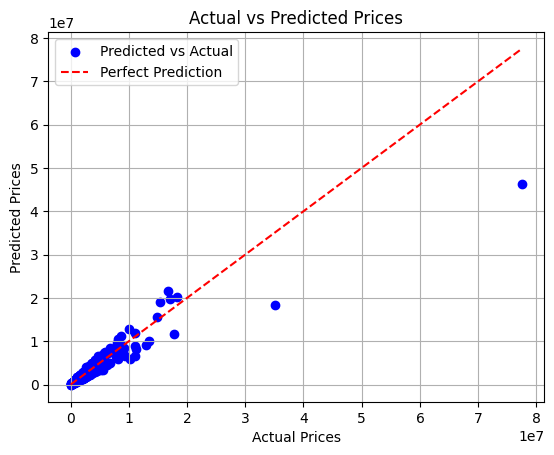

In [128]:
import matplotlib.pyplot as plt

# Actual vs Predicted scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

#### Muller loop

In [129]:
target_var = 'PRICE'
potential_features = ['price_1_year']
final_results, best_regression_model, features_best = mullerloop_regression_models(df, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['price_1_year']
Mean Squared Error: 771301070857.4877
R-squared: 0.8101652031012929


Model: RandomForestRegressor
Features: ['price_1_year']
Mean Squared Error: 691327512575.0316
R-squared: 0.8298485210265989


Model: KNNRegressor
Features: ['price_1_year']
Mean Squared Error: 431451098072.5962
R-squared: 0.8938100377803457


Model: MLPRegressor
Features: ['price_1_year']
Mean Squared Error: 915932830915.636
R-squared: 0.7745680260285098


Model: XGBoostRegressor
Features: ['price_1_year']
Mean Squared Error: 489070295397.46387
R-squared: 0.8796286382790169


Best Model: KNNRegressor
Best Features: ['price_1_year']


### **Linear regression to predict house prices in next 2 year**

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset
# Using the assessments and annual_increase as features
X = df[['PRICE']]
y = df['price_2_year']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 23747279627834.93
R-squared (R2 Score): 0.59


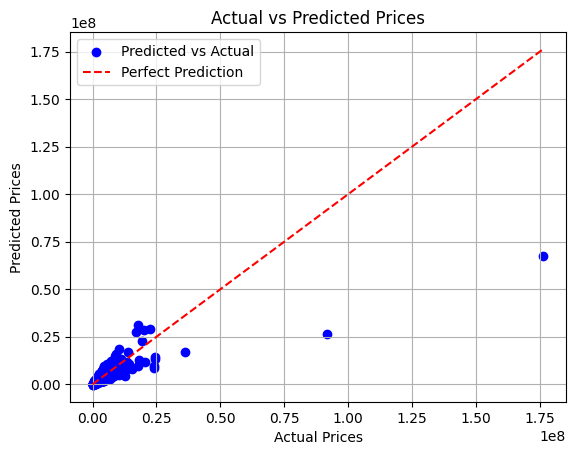

In [131]:
import matplotlib.pyplot as plt

# Actual vs Predicted scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

#### **Muller loop**

In [132]:
target_var = 'PRICE'
potential_features = ['price_2_year']
final_results, best_regression_model, features_best = mullerloop_regression_models(df, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['price_2_year']
Mean Squared Error: 2405628956600.416
R-squared: 0.40791981024713564


Model: RandomForestRegressor
Features: ['price_2_year']
Mean Squared Error: 1227718719900.8137
R-squared: 0.6978304028775624


Model: KNNRegressor
Features: ['price_2_year']
Mean Squared Error: 974495876917.5762
R-squared: 0.7601543238263485


Model: MLPRegressor
Features: ['price_2_year']
Mean Squared Error: 3564267408189.738
R-squared: 0.12275244377120953


Model: XGBoostRegressor
Features: ['price_2_year']
Mean Squared Error: 1032920865105.6536
R-squared: 0.7457746008030646


Best Model: KNNRegressor
Best Features: ['price_2_year']


### **Linear regression to predict house prices in next 5 year**

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame

# Prepare the dataset
# Using the assessments and annual_increase as features
X = df[['PRICE']]
y = df['price_5_year']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 7158681494573233.00
R-squared (R2 Score): 0.21


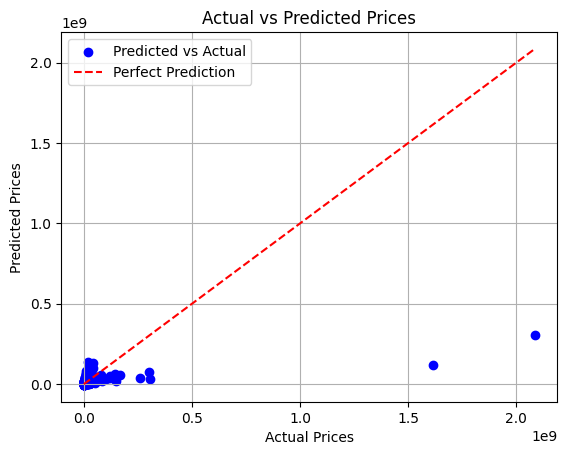

In [134]:
import matplotlib.pyplot as plt

# Actual vs Predicted scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

#### **Muller loop**

In [135]:
target_var = 'PRICE'
potential_features = ['price_5_year']
final_results, best_regression_model, features_best = mullerloop_regression_models(df, target_var, potential_features)

# Print the results
for result in final_results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_regression_model}")
print(f"Best Features: {features_best}")

Model: LinearRegression
Features: ['price_5_year']
Mean Squared Error: 4128818215833.5786
R-squared: -0.016196394701065264


Model: RandomForestRegressor
Features: ['price_5_year']
Mean Squared Error: 3380569234783.2017
R-squared: 0.16796475677957123


Model: KNNRegressor
Features: ['price_5_year']
Mean Squared Error: 2618748848407.397
R-squared: 0.3554661408502109


Model: MLPRegressor
Features: ['price_5_year']
Mean Squared Error: 11101632973224.69
R-squared: -1.732365246651518


Model: XGBoostRegressor
Features: ['price_5_year']
Mean Squared Error: 2631453231859.9126
R-squared: 0.3523393021311224


Best Model: KNNRegressor
Best Features: ['price_5_year']


After evaluating our Linear Regression model, the R² score for predicting the property price for the upcoming year was notably good. However, as we attempted to predict further into the future, the accuracy of our model decreased. This suggests that while our model is effective in short-term predictions, external factors and inherent market uncertainties impact its performance for long-term forecasts. Using muller loop we have determined the best regressor model in this case is KNN regressor

# Conclusion

**Clustering** - K-means clustering and GMM clustering was performed to detect house locations with lowest crime rate. <br/>

**Fractal Clustering** - To suggest suitable property to invest or not Fractal Clustering was performed on various features to find the golden cluster. <br/>

**Classification** - Classification was performed on amalgamated datasets and a muller loop was used to find the best classifier (AdaBoost) to get the best accuracy of the model to help find the properties to invest upon. <br/>

**Classification of properties into most, more and least desirable properties**: The model provides a reliable way to categorize properties based on their profit margins, which can assist investors in making informed investment decisions.

**Feature Importance Analysis** - Feature Importance Analysis was performed using random forest classifier and found that Monthly Rent Estimate, Price and Mortgage fees have the highest feature Importance.<br/>

**Changing Data Distribution and Dynamic Data Visualization** - Upsampling and downsampling of the important features (Rent, Price) was performed. Visualizations were employed to analyze the effects of upsampling and downsampling on the important features.<br/>

**Regression Analysis** - Regression Analysis was Performed on Latent Variables Living Experience Quality, Investment Potential, Desirability Score and Financial Feasibility and muller loop was used to identify the best regression model  and found that Linear Regression was the best model.<br/>

**Housing price prediction applying linear regression and Muller loop** -
Housing Price Prediction for next 1,2,5 years - Linear Regression Model was used for predicting the property prices for the upcoming year and was found notably good. However, as we attempted to predict further into the future, the accuracy of our model decreased. This suggests that while our model is effective in short-term predictions, external factors and inherent market uncertainties impact its performance for long-term forecasts.Using muller loop we have determined the best regressor model in this case is KNN regressor

